# ACA Data analysis

Import diferent libraries

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import timeit
import datetime
# libraries for import all file names
from os import listdir
from os.path import isfile, join
from statsmodels.tsa.seasonal import seasonal_decompose
from prettytable import PrettyTable
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsRegressor


## Analisis de les Estacions 

| Nom                        | V_llocH         | V_sensorH1 | V_sensorH2 | Sensor     | Codi ordre | Comarca         | Província | Estat     | Riu              | Superfície conca drenada | Coordenada Y (UTM ETRS89) | Coordenada X (UTM ETRS89) | Subconca | Terme municipal            | Conca  | location                 |
|----------------------------|-----------------|------------|------------|------------|------------|-----------------|-----------|-----------|------------------|--------------------------|---------------------------|---------------------------|----------|----------------------------|--------|--------------------------|
| Torelló_Ges                | F009891         |    3106574 |            | CALC001661 | TA-15      | OSONA           | GIRONA    | En servei | RIU GES          | 88,02 km²                |                   4655539 |                    439144 | ALT TER  | TORELLÓ                    | EL TER | 42.049547207 2.2646119   |
| Masies de Roda             | L08116-72-00002 |    3358431 |    3369214 | CALC001145 | TA-30      | OSONA           | BARCELONA | En servei | RIU TER + GURRI        | 1387,05 km²              |                   4648259 |                    442102 | ALT TER  | MASIES DE RODA, LES        | EL TER | 41.983802 2.302718379    |
| Ripoll                     | L17147-72-00005 |    3358425 |    4277302 | CALC001130 | TA-10      | RIPOLLÈS        | GIRONA    | En servei | RIU TER          | 736,91 km²               |                   4669209 |                    433448 | ALT TER  | RIPOLL                     | EL TER | 42.172192162 2.194229581 |
| Sant Joan de les Abadesses | L17167-72-00001 |    3358409 |    4277304 | CALC001126 | TA-05      | RIPOLLÈS        | GIRONA    | En servei | RIU TER          | 301,02 km²               |                   4674665 |                    437546 | ALT TER  | SANT JOAN DE LES ABADESSES | EL TER | 42.221664291 2.243255294 |
| Anglès                     | F014672         |    3315106 |    3369128 | CALC001512 | TB-10      | SELVA           | GIRONA    | En servei | RIERA D'OSOR     | 88,00 km²                |                   4645530 |                    469379 | BAIX TER | ANGLÈS                     | EL TER | 41.961160899 2.630484738 |
| Ginestar_Llèmena           | F000005         |    4181745 |            | CALC001598 | TB-15      | GIRONÈS         | GIRONA    | En servei | RIERA DE LLEMANA | 77,19 km²                |                   4651536 |                    477269 | BAIX TER | SANT GREGORI               | EL TER | 42.015521388 2.725462811 |
| Campllong_Gotarra          | L17038-72-00002 | 086R01CR   |    3379301 | CALC001175 | TB-25      | GIRONÈS         | GIRONA    | En servei | RIERA GOTARRA    | 100,43 km                |                   4638465 |                    484973 | BAIX TER | CAMPLLONG                  | EL TER | 41.897979761 2.818842216 |
| Girona_Onyar               | L17079-72-00004 | 088R01CR   |    3369181 | CALC001179 | TB-35      | GIRONÈS         | GIRONA    | En servei | RIU ONYAR        | 321,79 km²               |                   4647022 |                    485464 | BAIX TER | GIRONA                     | EL TER | 41.975059495 2.824550321 |
| Riudellots_Onyar           | F026458         | 086R02CR   |    3379302 | CALC001176 | TB-30      | SELVA           | GIRONA    | En servei | RIU ONYAR        | 117,02 km²               |                   4638503 |                    484777 | BAIX TER | RIUDELLOTS DE LA SELVA     | EL TER | 41.898318267 2.816478373 |
| Colomers                   | L17055-72-00002 |    3227966 |            | CALC001201 | TB-45      | BAIX EMPORDÀ    | GIRONA    | En servei | RIU TER          | 2901,95 km²              |                   4658310 |                    499269 | BAIX TER | COLOMERS                   | EL TER | 42.076860022 2.991162733 |
| Girona_Ter                 | L17079-72-00005 | 083R01CR   |    3369186 | CALC001218 | TB-20      | GIRONÈS         | GIRONA    | En servei | RIU TER          | 2257,00 km²              |                   4648705 |                    485021 | BAIX TER | GIRONA                     | EL TER | 41.990209392 2.819160445 |
| Pasteral_Cabal             | F001242         |    4141221 |    4265263 | CALC001543 | TB-05      | SELVA           | GIRONA    | En servei | RIU TER          | 1799,32 km²              |                   4648235 |                    467132 | BAIX TER | AMER                       | EL TER | 41.985432993 2.603218761 |
| Torroella de Montgrí       | L17199-72-00001 |    3235540 |    3379354 | CALC001186 | TB-50      | BAIX EMPORDÀ    | GIRONA    | En servei | RIU TER          | 2948,48 km²              |                   4653688 |                    510378 | BAIX TER | TORROELLA DE MONTGRÍ       | EL TER | 42.035163473 3.125380537 |
| Conellà Terri              | F001243         |    3225389 |            | CALC001660 | TB-40      | PLA DE L'ESTANY | GIRONA    | En servei | RIU TERRI        | 23,78 km²                |                   4660993 |                    483379 | BAIX TER | CORNELLÀ DEL TERRI         | EL TER | 42.100848824 2.798988336 |

In [4]:
path = 'dataACA/cabal'
filePaths = [f for f in listdir(path) if isfile(join(path, f))]
filePaths

['Extracció dades_Anglès_Cabal_REV0_3315106.txt',
 'Extracció dades_Anglès_Cabal_REV1_3369128.txt',
 'Extracció dades_Campllong_Gotarra_Cabal_REV0_086R01CR.txt',
 'Extracció dades_Campllong_Gotarra_Cabal_REV1_3379301.txt',
 'Extracció dades_Colomers_REV0_3227966.txt',
 'Extracció dades_Conellà Terri_Terri_REV0_3225389.txt',
 'Extracció dades_Ginestar_Llèmena_Cabal_REV0_4181745.txt',
 'Extracció dades_Girona_Onyar_REV0_088R01CR.txt',
 'Extracció dades_Girona_Onyar_REV1_3369181.txt',
 'Extracció dades_Girona_Ter_Cabal_REV0_083R01CR.txt',
 'Extracció dades_Girona_Ter_Cabal_REV1_3369186.txt',
 'Extracció dades_Masies de Roda_Cabal_REV0_3358431.txt',
 'Extracció dades_Masies de Roda_Cabal_REV1_3369214.txt',
 'Extracció dades_Pasteral_Cabal_REV0_4141221.txt',
 'Extracció dades_Pasteral_Cabal_REV1_4265263.txt',
 'Extracció dades_Ripoll_REV0_Cabal_3358425.txt',
 'Extracció dades_Ripoll_REV1_Cabal_4277302.txt',
 'Extracció dades_Riudellots_Onyar_Cabal_REV0_086R02CR.txt',
 'Extracció dades_Riude

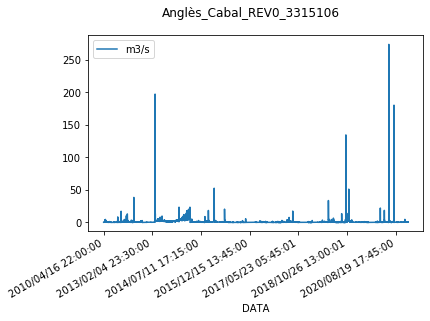

                m3/s
count  312859.000000
mean        1.029665
std         4.500545
min         0.000000
25%         0.088000
50%         0.254000
75%         0.589000
max       273.664000


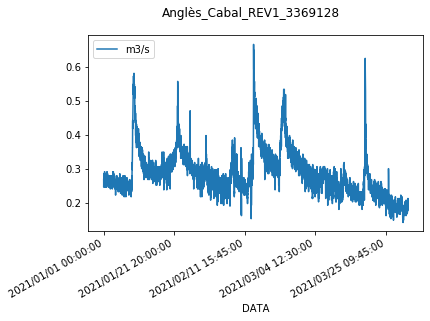

              m3/s
count  8634.000000
mean      0.285670
std       0.066554
min       0.141305
25%       0.245361
50%       0.273349
75%       0.311908
max       0.666070


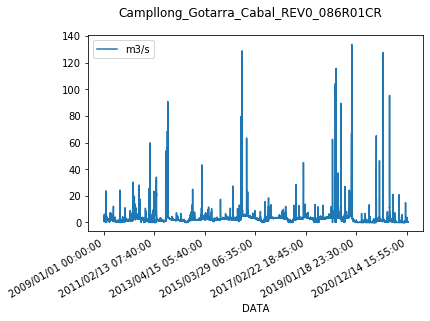

               m3/s
count  1.205279e+06
mean   2.601684e+00
std    4.107638e+00
min    0.000000e+00
25%    1.109000e+00
50%    2.136000e+00
75%    3.270000e+00
max    1.336870e+02


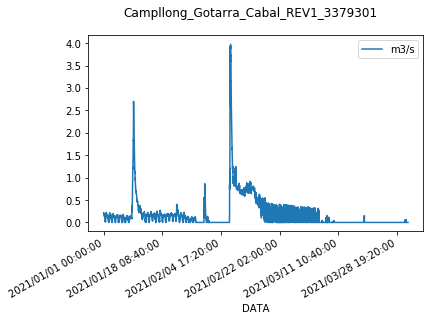

               m3/s
count  25926.000000
mean       0.174001
std        0.363750
min        0.000000
25%        0.000000
50%        0.018000
75%        0.180000
max        3.971363


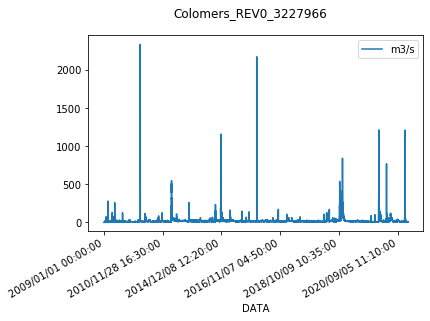

               m3/s
count  1.034042e+06
mean   1.981118e+01
std    4.165566e+01
min   -1.000000e+00
25%    1.085400e+01
50%    1.325700e+01
75%    1.688000e+01
max    2.335000e+03


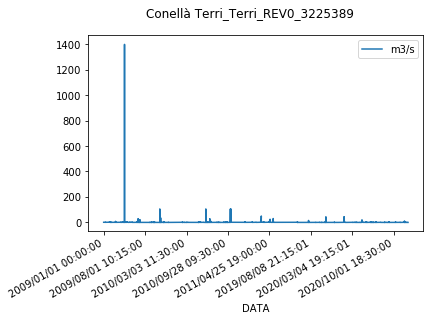

                m3/s
count  146842.000000
mean        0.462009
std         6.784482
min         0.000000
25%         0.159000
50%         0.239000
75%         0.441000
max      1397.923000


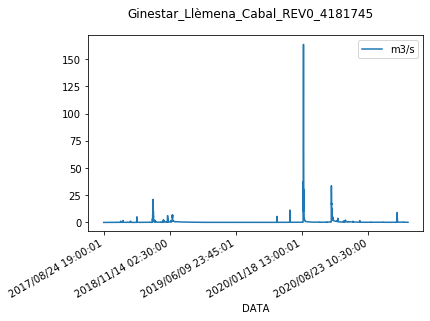

               m3/s
count  91947.000000
mean       0.362678
std        2.201938
min        0.000000
25%        0.044000
50%        0.083000
75%        0.260000
max      163.670000


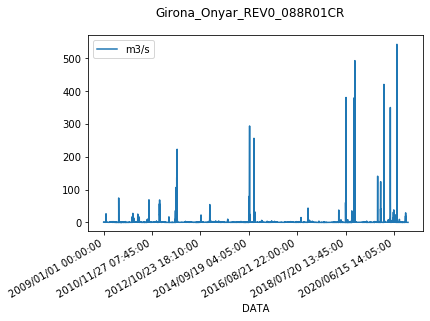

               m3/s
count  1.257547e+06
mean   1.409078e+00
std    1.656580e+01
min    0.000000e+00
25%    1.560000e-01
50%    2.990000e-01
75%    5.430000e-01
max    5.420000e+02


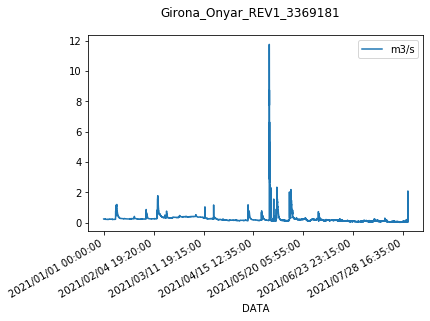

               m3/s
count  60953.000000
mean       0.234797
std        0.323700
min        0.005600
25%        0.122611
50%        0.194000
75%        0.267929
max       11.749772


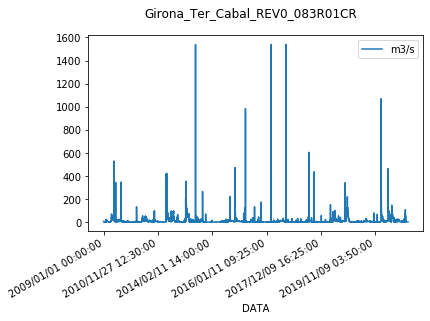

               m3/s
count  1.120757e+06
mean   1.204494e+01
std    2.693304e+01
min    0.000000e+00
25%    3.531000e+00
50%    5.809000e+00
75%    9.294000e+00
max    1.540000e+03


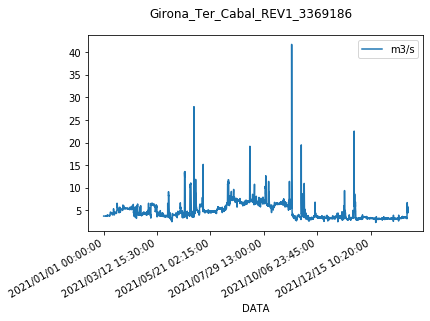

                m3/s
count  113987.000000
mean        4.740856
std         1.755695
min         2.282905
25%         3.372183
50%         4.238675
75%         5.876244
max        41.775495


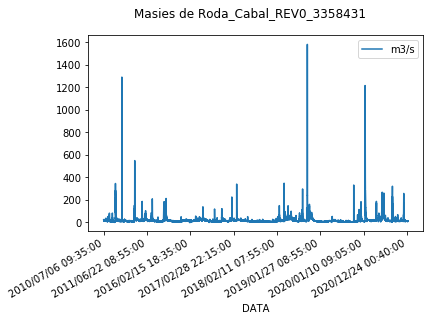

                m3/s
count  702583.000000
mean       15.897169
std        31.510401
min        -3.480000
25%         6.205000
50%        10.031000
75%        15.943500
max      1580.175000


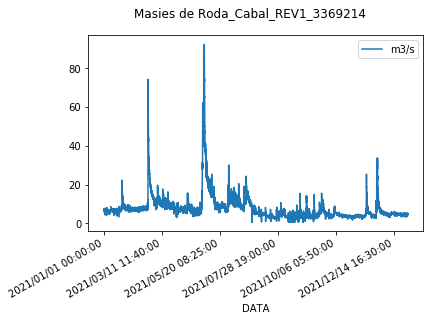

                m3/s
count  104992.000000
mean        7.825641
std         7.067072
min         0.498932
25%         4.280130
50%         6.646178
75%         8.694010
max        92.258533


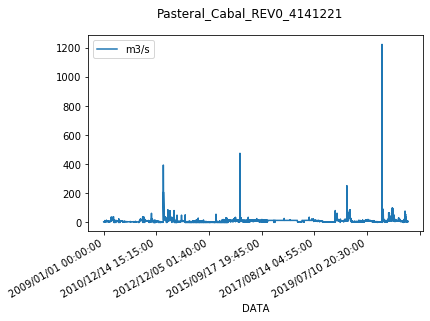

               m3/s
count  1.154978e+06
mean   1.183750e+01
std    2.009309e+01
min    0.000000e+00
25%    5.084000e+00
50%    8.746000e+00
75%    1.400000e+01
max    1.223640e+03


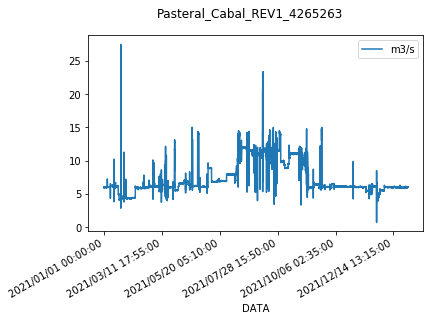

                m3/s
count  105031.000000
mean        7.335998
std         2.351062
min         0.708617
25%         5.988586
50%         6.103849
75%         8.878959
max        27.479749


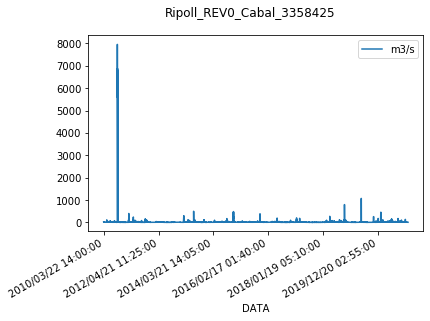

               m3/s
count  1.108857e+06
mean   2.003824e+01
std    2.358062e+02
min   -9.210000e-01
25%    4.344000e+00
50%    7.280000e+00
75%    1.253000e+01
max    7.955334e+03


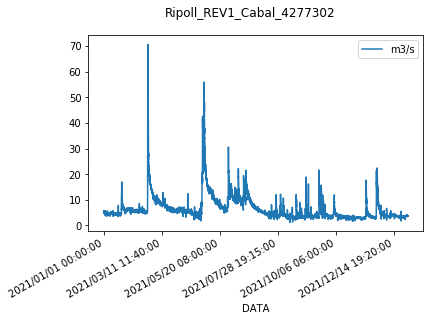

                m3/s
count  104958.000000
mean        6.515966
std         5.070762
min         1.172656
25%         3.691313
50%         5.054333
75%         7.301177
max        70.611979


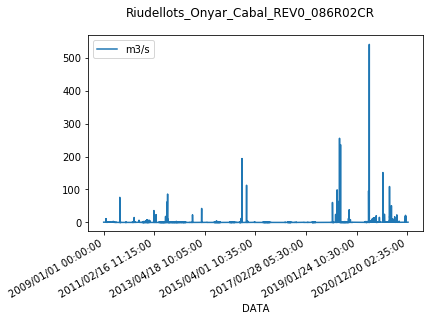

               m3/s
count  1.203711e+06
mean   3.168877e-01
std    2.742279e+00
min    0.000000e+00
25%    0.000000e+00
50%    0.000000e+00
75%    3.800000e-01
max    5.402900e+02


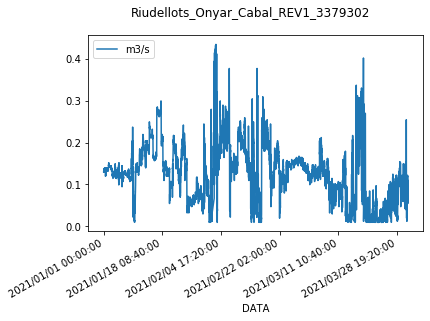

               m3/s
count  25926.000000
mean       0.127386
std        0.068341
min        0.009371
25%        0.079525
50%        0.129525
75%        0.162025
max        0.434525


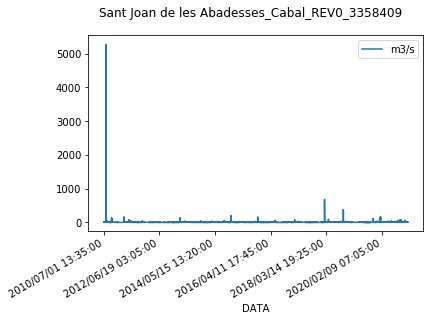

               m3/s
count  1.094087e+06
mean   7.202103e+00
std    8.030195e+01
min    0.000000e+00
25%    1.924000e+00
50%    3.330000e+00
75%    5.684000e+00
max    5.274930e+03


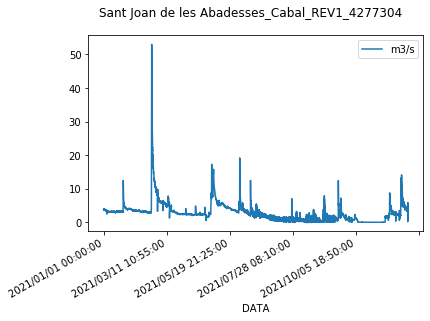

               m3/s
count  96478.000000
mean       2.842506
std        3.259845
min        0.002000
25%        0.807509
50%        2.420220
75%        3.566715
max       52.985291


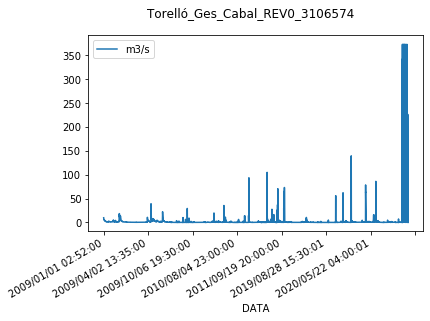

                m3/s
count  170924.000000
mean        1.076523
std         4.747214
min        -0.005800
25%         0.079000
50%         0.264700
75%         0.829000
max       373.000000


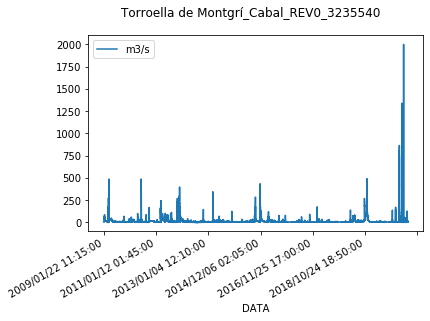

               m3/s
count  1.164286e+06
mean   1.220553e+01
std    3.089247e+01
min    0.000000e+00
25%    3.496000e+00
50%    4.875500e+00
75%    9.846000e+00
max    2.000000e+03


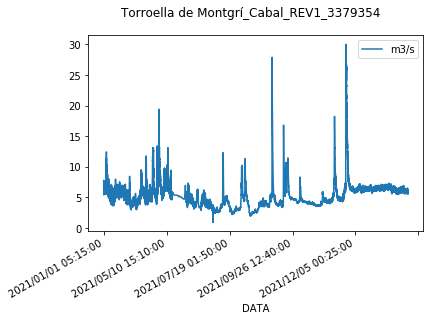

               m3/s
count  96705.000000
mean       5.419759
std        2.312950
min        0.913121
25%        4.107564
50%        5.101782
75%        6.327691
max       30.000000


In [5]:
# cabal
path = 'dataACA/cabal'
filePaths = [f for f in listdir(path) if isfile(join(path, f))]
for path in filePaths:
    # REGEX que agafa el nom de l'estació a partir del nom de l'arxiu
    namePath = re.findall(r"_(.+)\.", path)[0]
    # creem el path
    data = pd.read_csv("dataACA/cabal/"+path, sep='|',encoding= 'unicode_escape',names =['DATA', 'V_lloch', 'V_sensorh', 'm3/s', 'S','V_unitats'])    # agafem les columnes DATA i PPT i --> DATA la posem com a index
    data = data[["DATA", "m3/s"]].set_index('DATA')
    # imprimim l'histograma i la descripció
    data.plot(title=namePath, subplots=True)    
    plt.show()
    print(data.describe())

La majoria d'estacions estan separades per dos fitxers. He d'ajuntar els dos fitxers en un únic

## Generar DataFrame de ACA cabal

### Unió de fitxers per cada estació

Per Generar aquest DataFrame, primer he d'unir en un sol fitxer les estacions que les tinc separades per dos fitxers. 
Aquestes són:

| V_llocH             | Fitxer1                                                             | V_sensorH1 | Fitxer2?                                                            | V_sensorH2 |
|---------------------|---------------------------------------------------------------------|------------|---------------------------------------------------------------------|-----------:|
| **F014672**         | 'Extracció dades_Anglès_Cabal_REV0_3315106.txt'                     | 3315106    | 'Extracció dades_Anglès_Cabal_REV1_3369128.txt'                     | 3369128    |
| **L17038-72-00002** | 'Extracció dades_Campllong_Gotarra_Cabal_REV0_086R01CR.txt'         |   086R01CR | 'Extracció dades_Campllong_Gotarra_Cabal_REV1_3379301.txt'          | 3379301    |
| **L17055-72-00002** | 'Extracció dades_Colomers_REV0_3227966.txt'                         | 3227966    |                                                                     |            |
| **F001243**         | 'Extracció dades_Conellà Terri_Terri_REV0_3225389.txt'              | 3225389    |                                                                     |            |
| **F000005**         | 'Extracció dades_Ginestar_Llèmena_Cabal_REV0_4181745.txt'           | 4181745    |                                                                     |            |
| **L17079-72-00004** | 'Extracció dades_Girona_Onyar_REV0_088R01CR.txt'                    | 088R01CR   | 'Extracció dades_Girona_Onyar_REV1_3369181.txt'                     | 3369181    |
| **L17079-72-00005** | 'Extracció dades_Girona_Ter_Cabal_REV0_083R01CR.txt'                | 083R01CR   | 'Extracció dades_Girona_Ter_Cabal_REV1_3369186.txt'                 | 3369186    |
| **L08116-72-00002** | 'Extracció dades_Masies de Roda_Cabal_REV0_3358431.txt'             | 3358431    | 'Extracció dades_Masies de Roda_Cabal_REV1_3369214.txt'             | 3369214    |
| **F001242**         | 'Extracció dades_Pasteral_Cabal_REV0_4141221.txt'                   | 4141221    | 'Extracció dades_Pasteral_Cabal_REV1_4265263.txt'                   | 4265263    |
| **L17147-72-00005** | 'Extracció dades_Ripoll_REV0_Cabal_3358425.txt'                     | 3358425    | 'Extracció dades_Ripoll_REV1_Cabal_4277302.txt'                     | 4277302    |
| **F026458**         | 'Extracció dades_Riudellots_Onyar_Cabal_REV0_086R02CR.txt'          | 086R02CR   | 'Extracció dades_Riudellots_Onyar_Cabal_REV1_3379302.txt'           | 3379302    |
| **L17167-72-00001** | 'Extracció dades_Sant Joan de les Abadesses_Cabal_REV0_3358409.txt' | 3358409    | 'Extracció dades_Sant Joan de les Abadesses_Cabal_REV1_4277304.txt' | 4277304    |
| **F009891**         | 'Extracció dades_Torelló_Ges_Cabal_REV0_3106574.txt'                | 3106574    |                                                                     |            |
| **L17199-72-00001** | 'Extracció dades_Torroella de Montgrí_Cabal_REV0_3235540.txt'       | 3235540    | 'Extracció dades_Torroella de Montgrí_Cabal_REV1_3379354.txt'       | 3379354    |

In [6]:
def combineTwoDataframesPriorizeLeft(dfL,dfR=None): # Function definition
    """
    Es combinen el dfL i el dfR tenint pes el dfL quan els dos tenen valors en el mateix punt de temps.
    Si nomès es passa el dfL, el retorna tractat.
    """
    if (dfR == None):
        data1 = pd.read_csv("dataACA/cabal/"+dfL, sep='|',encoding= 'unicode_escape',names =['DATA', 'V_llocH', 'V_sensorH', 'm3/s', 'S','V_unitats'] )
        
        codeStation= data1.iloc[0]['V_llocH']
        data1 = data1[["DATA", "m3/s"]].set_index('DATA')
        data1.rename(columns = {'m3/s':codeStation}, inplace = True)
        
        return data1
    
    else:
        data1 = pd.read_csv("dataACA/cabal/"+dfL, sep='|',encoding= 'unicode_escape',names =['DATA', 'V_llocH', 'V_sensorH', 'm3/s', 'S','V_unitats'] )
        data2 = pd.read_csv("dataACA/cabal/"+dfR, sep='|',encoding= 'unicode_escape',names =['DATA', 'V_llocH', 'V_sensorH', 'm3/s', 'S','V_unitats'] )

        codeStation= data1.iloc[0]['V_llocH']
        data1 = data1[["DATA", "m3/s"]].set_index('DATA')
        data1.rename(columns = {'m3/s':codeStation}, inplace = True)

        codeStation2= data2.iloc[0]['V_llocH']
        data2 = data2[["DATA", "m3/s"]].set_index('DATA')
        data2.rename(columns = {'m3/s':codeStation2}, inplace = True)

        return data1.combine_first(data2)
    

In [7]:
# Combinem els dos fitxers per cada lloc
F014672 = combineTwoDataframesPriorizeLeft('Extracció dades_Anglès_Cabal_REV0_3315106.txt','Extracció dades_Anglès_Cabal_REV1_3369128.txt')
L170387200002 = combineTwoDataframesPriorizeLeft('Extracció dades_Campllong_Gotarra_Cabal_REV0_086R01CR.txt','Extracció dades_Campllong_Gotarra_Cabal_REV1_3379301.txt')
L170797200004 = combineTwoDataframesPriorizeLeft('Extracció dades_Girona_Onyar_REV0_088R01CR.txt','Extracció dades_Girona_Onyar_REV1_3369181.txt')
L170797200005 = combineTwoDataframesPriorizeLeft('Extracció dades_Girona_Ter_Cabal_REV0_083R01CR.txt','Extracció dades_Girona_Ter_Cabal_REV1_3369186.txt')
L081167200002 = combineTwoDataframesPriorizeLeft('Extracció dades_Masies de Roda_Cabal_REV0_3358431.txt','Extracció dades_Masies de Roda_Cabal_REV1_3369214.txt')
F001242 = combineTwoDataframesPriorizeLeft('Extracció dades_Pasteral_Cabal_REV0_4141221.txt','Extracció dades_Pasteral_Cabal_REV1_4265263.txt')
L171477200005 = combineTwoDataframesPriorizeLeft('Extracció dades_Ripoll_REV0_Cabal_3358425.txt','Extracció dades_Ripoll_REV1_Cabal_4277302.txt')
F026458 = combineTwoDataframesPriorizeLeft('Extracció dades_Riudellots_Onyar_Cabal_REV0_086R02CR.txt','Extracció dades_Riudellots_Onyar_Cabal_REV1_3379302.txt')
L171677200001 = combineTwoDataframesPriorizeLeft('Extracció dades_Sant Joan de les Abadesses_Cabal_REV0_3358409.txt','Extracció dades_Sant Joan de les Abadesses_Cabal_REV1_4277304.txt')
L171997200001 = combineTwoDataframesPriorizeLeft('Extracció dades_Torroella de Montgrí_Cabal_REV0_3235540.txt','Extracció dades_Torroella de Montgrí_Cabal_REV1_3379354.txt')

In [8]:
# Carreguem els que nomès són un fitxer 
L170557200002 = combineTwoDataframesPriorizeLeft('Extracció dades_Colomers_REV0_3227966.txt')
F001243 = combineTwoDataframesPriorizeLeft('Extracció dades_Conellà Terri_Terri_REV0_3225389.txt')
F000005 = combineTwoDataframesPriorizeLeft('Extracció dades_Ginestar_Llèmena_Cabal_REV0_4181745.txt')
F009891 = combineTwoDataframesPriorizeLeft('Extracció dades_Torelló_Ges_Cabal_REV0_3106574.txt')

In [9]:
ArrayDeDadesSenseTractar = [F014672,L170387200002,L170797200004,L170797200005,L081167200002,F001242,L171477200005,F026458,L171677200001,L171997200001,L170557200002,F001243,F000005,F009891]

In [10]:
# exemple:
ArrayDeDadesSenseTractar[1]

,L17038-72-00002
DATA,
2009/01/01 00:00:00,3.892
2009/01/01 00:05:00,3.892
2009/01/01 00:10:00,3.892
2009/01/01 00:15:00,3.892
2009/01/01 00:20:00,3.868
...,...
2021/04/01 00:05:00,0.000
2021/04/01 00:10:00,0.000
2021/04/01 00:15:00,0.000


### Analisis de les dades ajuntades

Primer de tot hem de mirar entre quines dates tenim les dades:

In [11]:
def analizeTimeSeriesDates(array):
    myTable = PrettyTable(["V_llocH", "Desde", "Fins"])
    for dataFrame in array:
        myTable.add_row([dataFrame.columns.item(), dataFrame.head(1).index.item(), dataFrame.tail(1).index.item()])
    return myTable

In [32]:
print(analizeTimeSeriesDates(ArrayDeDadesSenseTractar))

+-----------------+---------------------+---------------------+
|     V_llocH     |        Desde        |         Fins        |
+-----------------+---------------------+---------------------+
|     F014672     | 2010/04/16 22:00:00 | 2021/04/01 00:15:00 |
| L17038-72-00002 | 2009/01/01 00:00:00 | 2021/04/01 00:25:00 |
| L17079-72-00004 | 2009/01/01 00:00:00 | 2021/07/31 23:55:00 |
| L17079-72-00005 | 2009/01/01 00:00:00 | 2022/02/01 23:55:00 |
| L08116-72-00002 | 2010/07/06 09:35:00 | 2022/01/01 00:25:00 |
|     F001242     | 2009/01/01 00:00:00 | 2022/01/01 00:25:00 |
| L17147-72-00005 | 2010/03/22 14:00:00 | 2022/01/01 00:25:00 |
|     F026458     | 2009/01/01 00:00:00 | 2021/04/01 00:25:00 |
| L17167-72-00001 | 2010/07/01 13:35:00 | 2021/12/01 23:55:00 |
| L17199-72-00001 | 2009/01/22 11:15:00 | 2022/02/01 00:25:00 |
| L17055-72-00002 | 2009/01/01 00:00:00 | 2021/01/01 23:50:00 |
|     F001243     | 2009/01/01 00:00:00 | 2020/12/31 07:30:00 |
|     F000005     | 2017/08/24 19:00:01 

Creem el DataFrame inicial que serà del 2009 al 20022

In [13]:
# Genero la base del que serà el gran DF
df = pd.DataFrame({'DATA':pd.date_range("2009-01-01", periods=227905, freq="30T")}).set_index('DATA')

In [14]:
# itero per totes les dades i creo el df
for dataFrame in ArrayDeDadesSenseTractar:
    df = df.join(dataFrame, how='left')

In [15]:
df

,F014672,L17038-72-00002,L17079-72-00004,L17079-72-00005,L08116-72-00002,F001242,L17147-72-00005,F026458,L17167-72-00001,L17199-72-00001,L17055-72-00002,F001243,F000005,F009891
DATA,,,,,,,,,,,,,,
2009-01-01 00:00:00,NaN,3.892,0.98,8.677000,NaN,4.036000,NaN,0.718,NaN,NaN,0.0,1.206,NaN,NaN
2009-01-01 00:30:00,NaN,3.868,0.98,8.865000,NaN,4.036000,NaN,0.718,NaN,NaN,0.0,1.206,NaN,NaN
2009-01-01 01:00:00,NaN,3.844,0.98,8.865000,NaN,4.036000,NaN,0.718,NaN,NaN,0.0,1.181,NaN,NaN
2009-01-01 01:30:00,NaN,3.820,0.98,8.865000,NaN,4.036000,NaN,0.718,NaN,NaN,0.0,1.181,NaN,NaN
2009-01-01 02:00:00,NaN,3.784,0.98,8.771000,NaN,4.059000,NaN,0.715,NaN,NaN,0.0,1.181,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31 22:00:00,NaN,NaN,NaN,3.126590,4.881057,6.017264,3.642061,NaN,NaN,6.320519,NaN,NaN,NaN,NaN
2021-12-31 22:30:00,NaN,NaN,NaN,3.114633,4.849859,6.017264,3.688313,NaN,NaN,6.320107,NaN,NaN,NaN,NaN
2021-12-31 23:00:00,NaN,NaN,NaN,3.114633,4.747017,6.017264,3.642061,NaN,NaN,6.031444,NaN,NaN,NaN,NaN


In [16]:
df.to_excel("dataACA/Dataframes/DF_noTractat_cabal_ACA.xlsx")

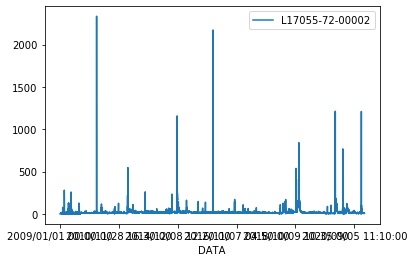

In [10]:
L170557200002.plot()

## Generar DataFrame de ACA nivell

### Unió de fitxers per cada estació

In [62]:
def combineTwoDataframesPriorizeLeftNivell(dfL,dfR=None,exception=None): # Function definition
    """
    Es combinen el dfL i el dfR tenint pes el dfL quan els dos tenen valors en el mateix punt de temps.
    Si nomès es passa el dfL, el retorna tractat.
    """
    if (dfR == None):
        data1 = pd.read_csv("dataACA/Nivell/"+dfL, sep='|',encoding= 'unicode_escape',names =['DATA', 'V_llocH', 'V_sensorH', 'm', 'S','V_unitats'] )
        
        codeStation= data1.iloc[0]['V_llocH']
        data1 = data1[["DATA", "m"]].set_index('DATA')
        data1.rename(columns = {'m':codeStation}, inplace = True)
        
        return data1
    
    else:
        data1 = pd.read_csv("dataACA/Nivell/"+dfL, sep='|',encoding= 'unicode_escape',names =['DATA', 'V_llocH', 'V_sensorH', 'm', 'S','V_unitats'] )
        data2 = pd.read_csv("dataACA/Nivell/"+dfR, sep='|',encoding= 'unicode_escape',names =['DATA', 'V_llocH', 'V_sensorH', 'm', 'S','V_unitats'] )

        codeStation= data1.iloc[0]['V_llocH']
        data1 = data1[["DATA", "m"]].set_index('DATA')
        data1.rename(columns = {'m':codeStation}, inplace = True)

        codeStation2= data2.iloc[0]['V_llocH']
        data2 = data2[["DATA", "m"]].set_index('DATA')
        if (exception == 1):
            data2.rename(columns = {'m':codeStation}, inplace = True)
        else: 
            data2.rename(columns = {'m':codeStation2}, inplace = True)

        return data1.combine_first(data2)

In [63]:
# Combinem els dos fitxers per cada lloc
F014672 = combineTwoDataframesPriorizeLeftNivell('Extracció dades_Anglès_Nivell_REV0_3315105.txt','Extracció dades_Anglès_Nivell_REV1_3369127.txt')
L170387200002 = combineTwoDataframesPriorizeLeftNivell('Extracció dades_Campllong_Gotarra_Nivell_REV0_086R01NR.txt','Extracció dades_Campllong_Gotarra_Nivell_REV1_3379299.txt')
L170797200004 = combineTwoDataframesPriorizeLeftNivell('Extracció dades_Girona_Onyar_Nivell_REV0_088R01NR.txt','Extracció dades_Girona_Onyar_Nivell_REV1_3369182.txt')
L170797200005 = combineTwoDataframesPriorizeLeftNivell('Extracció dades_Girona_Ter_Nivell_REV0_083R01NR.txt','Extracció dades_Girona_Ter_Nivell_REV1_3369187.txt')
L081167200002 = combineTwoDataframesPriorizeLeftNivell('Extracció dades_Masies de Roda_Nivell_REV1_3369215.txt','Extracció dades_Masies de Roda_Nivell_REV0_071R02NR.txt',1)
F001242 = combineTwoDataframesPriorizeLeftNivell('Extracció dades_Pasteral_Nivell_REV0_4259494.txt','Extracció dades_Pasteral_Nivell_REV1_4259847.txt')
L171477200005 = combineTwoDataframesPriorizeLeftNivell('Extracció dades_Ripoll_Nivell_REV0_060R01NR_1.txt','Extracció dades_Ripoll_Nivell_REV1_3369247.txt')
F026458 = combineTwoDataframesPriorizeLeftNivell('Extracció dades_Riudellots_Onyar_Nivell_REV0_086R02NR.txt','Extracció dades_Riudellots_Onyar_Nivell_REV1_3379300.txt')
L171677200001 = combineTwoDataframesPriorizeLeftNivell('Extracció dades_Sant Joan de les Abadesses_Nivell_REV0_055R01NR_1.txt','Extracció dades_Sant Joan de les Abadesses_Nivell_REV1_3379340_2.txt')
L171997200001 = combineTwoDataframesPriorizeLeftNivell('Extracció dades_Torroella de Montgrí_Nivell_REV0_3358786.txt','Extracció dades_Torroella de Montgrí_Nivell_REV1_4167482.txt')

In [52]:
# Carreguem els que nomès són un fitxer 
L170557200002 = combineTwoDataframesPriorizeLeftNivell('Extracció dades_Colomers_Nivell_REV0_3225357.txt')
F001243 = combineTwoDataframesPriorizeLeftNivell('Extracció dades_Cornellà Terri_Terri_REV0_Nivell_3100399.txt')
F000005 = combineTwoDataframesPriorizeLeftNivell('Extracció dades_Ginestar_Llèmena_Nivell_REV0_3100395.txt')
F009891 = combineTwoDataframesPriorizeLeftNivell('Extracció dades_Torelló_Ges_Nivell_REV0_3104557.txt')

In [66]:
ArrayDeDadesSenseTractarNivell = [F014672,L170387200002,L170797200004,L170797200005,L081167200002,F001242,L171477200005,F026458,L171677200001,L171997200001,L170557200002,F001243,F000005,F009891]

### Analisis de les dades ajuntades

Creem el DataFrame inicial que serà del 2009 al 20022

In [67]:
def analizeTimeSeriesDates2(array):
    myTable2 = PrettyTable(["V_llocH", "Desde", "Fins"])
    for dataFrame in array:
        myTable2.add_row([dataFrame.columns.item(), dataFrame.head(1).index.item(), dataFrame.tail(1).index.item()])
    return myTable2

In [68]:
print(analizeTimeSeriesDates2(ArrayDeDadesSenseTractarNivell))

+-----------------+---------------------+---------------------+
|     V_llocH     |        Desde        |         Fins        |
+-----------------+---------------------+---------------------+
|     F014672     | 2010/04/16 22:00:00 | 2021/04/01 00:15:00 |
| L17038-72-00002 | 2009/01/01 00:00:00 | 2021/04/01 00:25:00 |
| L17079-72-00004 | 2009/01/01 00:00:00 | 2021/07/31 23:55:00 |
| L17079-72-00005 | 2009/01/01 00:00:00 | 2022/02/01 23:55:00 |
| L08116-72-00002 | 2009/01/01 00:00:00 | 2022/01/01 00:25:00 |
|     F001242     | 2009/01/01 00:00:00 | 2022/01/01 00:25:00 |
| L17147-72-00005 | 2009/01/01 00:00:00 | 2022/01/01 00:25:00 |
|     F026458     | 2009/01/01 00:00:00 | 2021/04/01 00:25:00 |
| L17167-72-00001 | 2009/01/01 00:00:00 | 2021/12/01 23:55:00 |
| L17199-72-00001 | 2011/03/11 10:20:00 | 2021/10/01 00:25:00 |
| L17055-72-00002 | 2009/01/01 00:00:00 | 2021/01/01 23:50:00 |
|     F001243     | 2009/01/01 00:00:00 | 2020/12/31 07:30:00 |
|     F000005     | 2009/01/01 00:00:00 

Creem el DataFrame inicial que serà del 2009 al 20022

In [56]:
# Genero la base del que serà el gran DF
df_nivell = pd.DataFrame({'DATA':pd.date_range("2009-01-01", periods=227905, freq="30T")}).set_index('DATA')

In [57]:
# itero per totes les dades i creo el df
for dataFrame in ArrayDeDadesSenseTractarNivell:
    df_nivell = df_nivell.join(dataFrame, how='left')

In [58]:
df_nivell

,F014672,L17038-72-00002,L17079-72-00004,L17079-72-00005,L08116-72-00002,F001242,L17147-72-00005,F026458,L17167-72-00001,L17199-72-00001,L17055-72-00002,F001243,F000005,F009891
DATA,,,,,,,,,,,,,,
2009-01-01 00:00:00,NaN,0.566,0.48,0.851,1.321,0.543,0.727,0.331,1.113,NaN,-0.019,0.4324,0.2462,NaN
2009-01-01 00:30:00,NaN,0.564,0.48,0.855,1.328,0.544,0.727,0.331,1.113,NaN,-0.016,0.4324,0.2512,NaN
2009-01-01 01:00:00,NaN,0.562,0.48,0.855,1.328,0.543,0.727,0.331,1.113,NaN,-0.016,0.4286,0.2512,NaN
2009-01-01 01:30:00,NaN,0.560,0.48,0.855,1.329,0.543,0.727,0.331,1.113,NaN,-0.016,0.4286,0.2512,NaN
2009-01-01 02:00:00,NaN,0.557,0.48,0.853,1.332,0.543,0.727,0.329,1.110,NaN,-0.022,0.4286,0.2512,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31 22:00:00,NaN,NaN,NaN,0.689,0.979,0.632,0.239,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-31 22:30:00,NaN,NaN,NaN,0.688,0.978,0.632,0.240,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-31 23:00:00,NaN,NaN,NaN,0.688,0.974,0.632,0.239,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
df_nivell.to_excel("dataACA/Dataframes/DF_noTractat_nivell_ACA.xlsx")

## Tractament de les dades

ACA agafar de riuades --> 23/01/2020  13:30:00


Forats 1 --> interpolation
- relacionar caval - nivell 
- multiple imputation --> emplenar forats (no grans)
- moving average (2 x standar variation) --> detectar valors xungos

In [2]:
cabal = pd.read_excel("dataACA/Dataframes/DF_noTractat_cabal_ACA.xlsx", index_col=0)

In [137]:
cabal.columns

Index(['F014672', 'L17038-72-00002', 'L17079-72-00004', 'L17079-72-00005',
       'L08116-72-00002', 'F001242', 'L17147-72-00005', 'F026458',
       'L17167-72-00001', 'L17199-72-00001', 'L17055-72-00002', 'F001243',
       'F000005', 'F009891'],
      dtype='object')

### Interpolació a forats d'un o + valors

In [1]:
def makePattern(numOfNulls):
    pattern = []
    pattern.append(False)
    for x in range(numOfNulls):
        pattern.append(True)
    pattern.append(False)
    return pattern

In [108]:
def interpolateOneValue(station,auxiliarDf,pattern):
    #agafem la columna station
    df = auxiliarDf[[station]]
    #fem un bool df que em digui quin valor es null
    dfNULL = df[station].isnull()
    #recorro el df buscant el patró  resultats a --> matched
    matched = dfNULL.rolling(window = len(pattern)).apply(lambda x: all(np.equal(x, pattern)))
    #primer i ultim valor els poso a 0.0 perque em surten NaN
    matched.fillna(0.0,inplace=True)
    #ho passo a bool
    matched2 = matched.astype(bool)
    #agafo els indexs on l'array ha trobat el pattern --> True
    idx_matched = np.where(matched2)[0]
    #per cada index faig el range 
    subset = [range((match-len(pattern)+1), match+1) for match in idx_matched]
    #print(station + " té: ", len(subset), " coincidències, amb pattern --> ",pattern )
    coincidencies = len(subset)
    if (coincidencies<1):
        #print(station + " no té cap coincidència")
        return auxiliarDf, coincidencies
    #agafo totes les rows que corresponen als indexs
    result = pd.concat([df.iloc[subs,:] for subs in subset], axis = 0)
    #elimino els indexs duplicats
    result = result[~result.index.duplicated(keep='first')]
    #interpolo
    result = result.interpolate()
    return result.combine_first(auxiliarDf), coincidencies

In [35]:
start = timeit.default_timer()
cabalAux = cabal.copy()
for x in range(5):
    for stationName in cabal.columns:
        # x+1 perque range comença a 0
        cabalAux, numPosats = interpolateOneValue(stationName,cabalAux,makePattern(x+1))
stop = timeit.default_timer()
print('Time: ', stop - start) 

KeyboardInterrupt: 

30'

In [ ]:
cabalAux,numPosats = interpolateOneValue('F014672',cabal,makePattern(1))
cabalAux,numPosats = interpolateOneValue('L17038-72-00002',cabalAux,makePattern(1))
cabalAux,numPosats = interpolateOneValue('L17079-72-00004',cabalAux,makePattern(1))
cabalAux,numPosats = interpolateOneValue('L17079-72-00005',cabalAux,makePattern(1))
cabalAux,numPosats = interpolateOneValue('L08116-72-00002',cabalAux,makePattern(1))
cabalAux,numPosats = interpolateOneValue('F001242',cabalAux,makePattern(1))
cabalAux,numPosats = interpolateOneValue('L17147-72-00005',cabalAux,makePattern(1))
cabalAux,numPosats = interpolateOneValue('F026458',cabalAux,makePattern(1))
cabalAux,numPosats = interpolateOneValue('L17167-72-00001',cabalAux,makePattern(1))
cabalAux,numPosats = interpolateOneValue('L17199-72-00001',cabalAux,makePattern(1))
cabalAux,numPosats = interpolateOneValue('L17055-72-00002',cabalAux,makePattern(1))
cabalAux,numPosats = interpolateOneValue('F001243',cabalAux,makePattern(1))
cabalAux,numPosats = interpolateOneValue('F000005',cabalAux,makePattern(1))
cabalAux,numPosats = interpolateOneValue('F009891',cabalAux,makePattern(1))

In [141]:
cabalAux = cabalAux[['F014672', 'L17038-72-00002', 'L17079-72-00004', 'L17079-72-00005',
       'L08116-72-00002', 'F001242', 'L17147-72-00005', 'F026458',
       'L17167-72-00001', 'L17199-72-00001', 'L17055-72-00002', 'F001243',
       'F000005', 'F009891']]

In [142]:
cabalAux.to_excel("dataACA/Dataframes/DF_interpolateOneValue_cabal_ACA.xlsx")

### Relacionar nivell - cabal

In [12]:
cabal = pd.read_excel("dataACA/Dataframes/DF_interpolateOneValue_cabal_ACA.xlsx", index_col=0)
nivell = pd.read_excel("dataACA/Dataframes/DF_noTractat_nivell_ACA.xlsx", index_col=0)

C:\Users\Sergi\AppData\Local\Temp\ipykernel_13264\1726571121.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df[stationName] < 0] = 0
C:\Users\Sergi\AppData\Local\Temp\ipykernel_13264\1726571121.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[df2[stationName] < 0] = 0
C:\Users\Sergi\AppData\Local\Temp\ipykernel_13264\1726571121.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns = {stationName:s

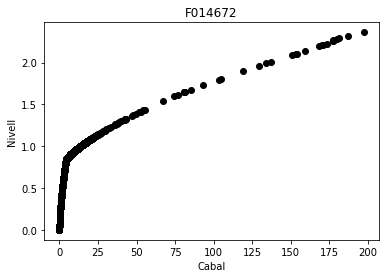

C:\Users\Sergi\AppData\Local\Temp\ipykernel_13264\1726571121.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df[stationName] < 0] = 0
C:\Users\Sergi\AppData\Local\Temp\ipykernel_13264\1726571121.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[df2[stationName] < 0] = 0
C:\Users\Sergi\AppData\Local\Temp\ipykernel_13264\1726571121.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns = {stationName:s

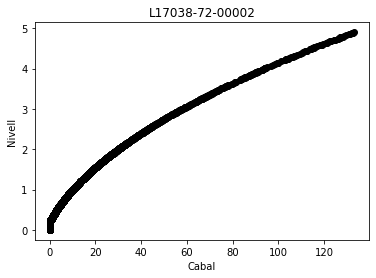

C:\Users\Sergi\AppData\Local\Temp\ipykernel_13264\1726571121.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df[stationName] < 0] = 0
C:\Users\Sergi\AppData\Local\Temp\ipykernel_13264\1726571121.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[df2[stationName] < 0] = 0
C:\Users\Sergi\AppData\Local\Temp\ipykernel_13264\1726571121.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns = {stationName:s

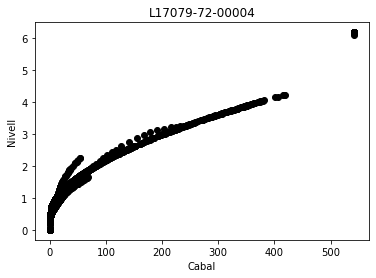

C:\Users\Sergi\AppData\Local\Temp\ipykernel_13264\1726571121.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df[stationName] < 0] = 0
C:\Users\Sergi\AppData\Local\Temp\ipykernel_13264\1726571121.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[df2[stationName] < 0] = 0
C:\Users\Sergi\AppData\Local\Temp\ipykernel_13264\1726571121.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns = {stationName:s

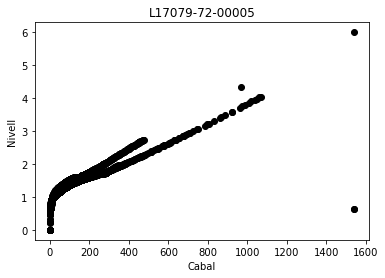

C:\Users\Sergi\AppData\Local\Temp\ipykernel_13264\1726571121.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df[stationName] < 0] = 0
C:\Users\Sergi\AppData\Local\Temp\ipykernel_13264\1726571121.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[df2[stationName] < 0] = 0
C:\Users\Sergi\AppData\Local\Temp\ipykernel_13264\1726571121.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns = {stationName:s

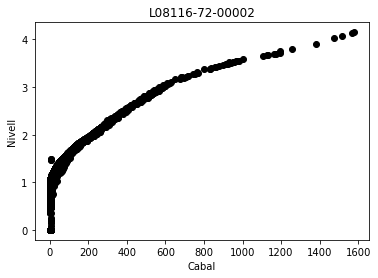

C:\Users\Sergi\AppData\Local\Temp\ipykernel_13264\1726571121.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df[stationName] < 0] = 0
C:\Users\Sergi\AppData\Local\Temp\ipykernel_13264\1726571121.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[df2[stationName] < 0] = 0
C:\Users\Sergi\AppData\Local\Temp\ipykernel_13264\1726571121.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns = {stationName:s

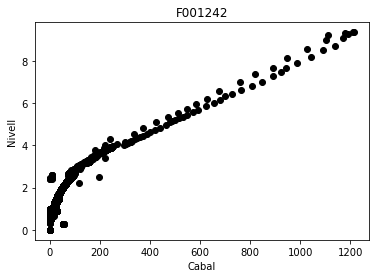

C:\Users\Sergi\AppData\Local\Temp\ipykernel_13264\1726571121.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df[stationName] < 0] = 0
C:\Users\Sergi\AppData\Local\Temp\ipykernel_13264\1726571121.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[df2[stationName] < 0] = 0
C:\Users\Sergi\AppData\Local\Temp\ipykernel_13264\1726571121.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns = {stationName:s

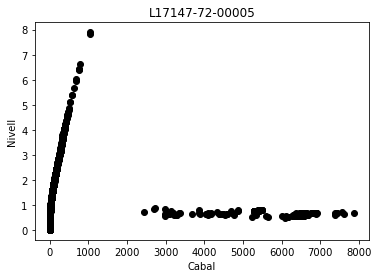

C:\Users\Sergi\AppData\Local\Temp\ipykernel_13264\1726571121.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df[stationName] < 0] = 0
C:\Users\Sergi\AppData\Local\Temp\ipykernel_13264\1726571121.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[df2[stationName] < 0] = 0
C:\Users\Sergi\AppData\Local\Temp\ipykernel_13264\1726571121.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns = {stationName:s

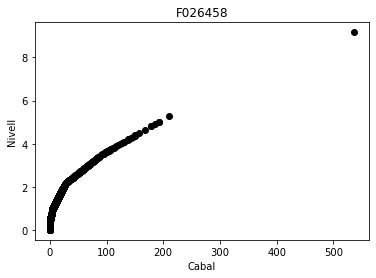

C:\Users\Sergi\AppData\Local\Temp\ipykernel_13264\1726571121.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df[stationName] < 0] = 0
C:\Users\Sergi\AppData\Local\Temp\ipykernel_13264\1726571121.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[df2[stationName] < 0] = 0
C:\Users\Sergi\AppData\Local\Temp\ipykernel_13264\1726571121.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns = {stationName:s

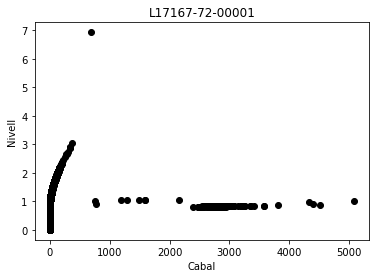

C:\Users\Sergi\AppData\Local\Temp\ipykernel_13264\1726571121.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df[stationName] < 0] = 0
C:\Users\Sergi\AppData\Local\Temp\ipykernel_13264\1726571121.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[df2[stationName] < 0] = 0
C:\Users\Sergi\AppData\Local\Temp\ipykernel_13264\1726571121.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns = {stationName:s

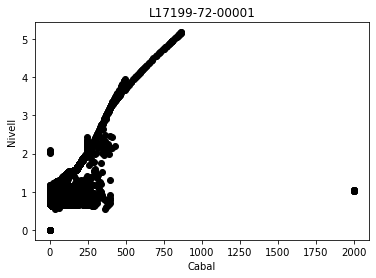

C:\Users\Sergi\AppData\Local\Temp\ipykernel_13264\1726571121.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df[stationName] < 0] = 0
C:\Users\Sergi\AppData\Local\Temp\ipykernel_13264\1726571121.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[df2[stationName] < 0] = 0
C:\Users\Sergi\AppData\Local\Temp\ipykernel_13264\1726571121.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns = {stationName:s

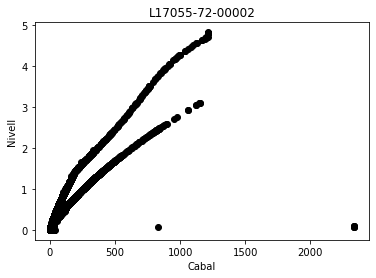

C:\Users\Sergi\AppData\Local\Temp\ipykernel_13264\1726571121.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df[stationName] < 0] = 0
C:\Users\Sergi\AppData\Local\Temp\ipykernel_13264\1726571121.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[df2[stationName] < 0] = 0
C:\Users\Sergi\AppData\Local\Temp\ipykernel_13264\1726571121.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns = {stationName:s

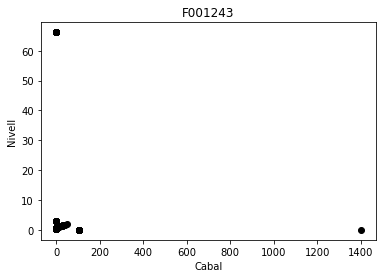

C:\Users\Sergi\AppData\Local\Temp\ipykernel_13264\1726571121.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df[stationName] < 0] = 0
C:\Users\Sergi\AppData\Local\Temp\ipykernel_13264\1726571121.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[df2[stationName] < 0] = 0
C:\Users\Sergi\AppData\Local\Temp\ipykernel_13264\1726571121.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns = {stationName:s

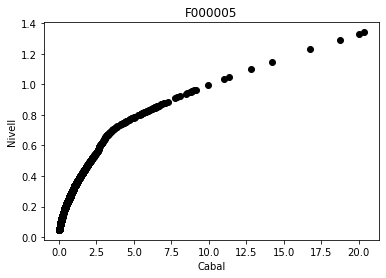

C:\Users\Sergi\AppData\Local\Temp\ipykernel_13264\1726571121.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df[stationName] < 0] = 0
C:\Users\Sergi\AppData\Local\Temp\ipykernel_13264\1726571121.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[df2[stationName] < 0] = 0
C:\Users\Sergi\AppData\Local\Temp\ipykernel_13264\1726571121.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns = {stationName:s

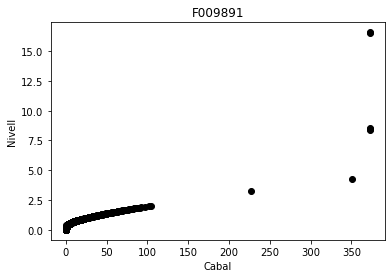

In [144]:
for stationName in cabal.columns:
    
    df = cabal[[stationName]]
    df2 = nivell[[stationName]]
    
    df.loc[df[stationName] < 0] = 0
    df2.loc[df2[stationName] < 0] = 0
    
    df.rename(columns = {stationName:stationName + "_cabal"}, inplace = True)
    df2.rename(columns = {stationName:stationName + "_nivell"}, inplace = True)

    df = df2.combine_first(df)

    final = df.dropna()
    #final = df2.drop_duplicates()

    X = final.iloc[:, :-1].values #cabal
    y = final.iloc[:, 1].values #nivell
    
    plt.title(stationName)
    plt.xlabel('Cabal')
    plt.ylabel('Nivell')
    plt.scatter(X, y, color="black")
    plt.show()

#### Valors incomprensibles in nivell - cabal

Detectem valors xungos i els treiem del DF (nomès els que podem comprovar amb nivell - cabal)

In [200]:
cabalAux = cabal.copy()
print(cabalAux.columns)

Index(['F014672', 'L17038-72-00002', 'L17079-72-00004', 'L17079-72-00005',
       'L08116-72-00002', 'F001242', 'L17147-72-00005', 'F026458',
       'L17167-72-00001', 'L17199-72-00001', 'L17055-72-00002', 'F001243',
       'F000005', 'F009891'],
      dtype='object')


In [13]:
def movingAverageResolverTotal(df, station, indxSD=2, save=False, printlogs=False ):
    #agafem una copia de df
    dfAux = df.copy()
    #passem la columna station a numpy
    dfNumpy = dfAux[station].to_numpy()
    #eliminem els NaN de l'array
    dfNumpy = dfNumpy[np.logical_not(np.isnan(dfNumpy))]
    #agafem els index's dels numeros que no compleixen això
    indexsValues = np.where( dfNumpy > (np.median(dfNumpy) + indxSD * np.std(dfNumpy)) )[0]
    #busco el valor minim de la llista
    minValue = np.take(dfNumpy, indexsValues).min()
    unionDf = df[[station]]
    #poso els valors negatius a 0
    #unionDf.loc[unionDf[station] < 0, station] =  0
    unionDf.loc[unionDf[station] < 0] = 0
    if(printlogs):
        print("Min value: " , minValue)
        print("Rows selected: ", unionDf.loc[unionDf[station] >= minValue])
    if (save):
        #poso tots els valors mes grans i igual al valor minim a 0
        unionDf.loc[unionDf[station] >= minValue] = None
        #intercanvio les columnes
        df[station] = unionDf[station]

In [14]:
def printStationPlot(df, stationName):
    
    df = df[[stationName]]
    df2 = nivell[[stationName]]
    
    df.loc[df['First Season'] > 1990, 'First Season'] = 1

    df.loc[df[stationName] < 0] = 0
    df2.loc[df2[stationName] < 0] = 0
    
    df = df.rename(columns = {stationName:stationName + "_cabal"})
    df2 = df2.rename(columns = {stationName:stationName + "_nivell"})

    df = df2.combine_first(df)

    final = df.dropna()
    #final = df2.drop_duplicates()

    X = final.iloc[:, :-1].values #cabal
    y = final.iloc[:, 1].values #nivell
    
    plt.title(stationName)
    plt.xlabel('Cabal')
    plt.ylabel('Nivell')
    plt.scatter(X, y, color="black")
    plt.show()

In [203]:
#movingAverageResolverTotal(cabalAux,"F014672",2,False,True)
#movingAverageResolverTotal(cabalAux,"L17038-72-00002",2,False,True)
movingAverageResolverTotal(cabalAux,"L17079-72-00004",26,True,True)
movingAverageResolverTotal(cabalAux,"L17079-72-00005",41,True,True)
#movingAverageResolverTotal(cabalAux,"L08116-72-00002",2,False,True)
#movingAverageResolverTotal(cabalAux,"F001242",2,False,True)
movingAverageResolverTotal(cabalAux,"L17147-72-00005",3.5,True,True)
movingAverageResolverTotal(cabalAux,"F026458",74,True,True)
movingAverageResolverTotal(cabalAux,"L17167-72-00001",6.5,True,True)
movingAverageResolverTotal(cabalAux,"L17199-72-00001",28,True,True)
movingAverageResolverTotal(cabalAux,"L17055-72-00002",28,True,True)
movingAverageResolverTotal(cabalAux,"F001243",8,True,True)
#movingAverageResolverTotal(cabalAux,"F000005",2,False,True)
movingAverageResolverTotal(cabalAux,"F009891",19,True,True)

C:\Users\Sergi\AppData\Local\Temp\ipykernel_24156\3489548116.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unionDf.loc[unionDf[station] < 0] = 0
C:\Users\Sergi\AppData\Local\Temp\ipykernel_24156\3489548116.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unionDf.loc[unionDf[station] < 0] = 0
C:\Users\Sergi\AppData\Local\Temp\ipykernel_24156\3489548116.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unionDf.loc[unionDf[s

Min value:  542.0
Rows selected:                       L17079-72-00004
DATA                                
2020-07-24 15:30:00            542.0
2020-07-24 16:00:00            542.0
2020-07-24 16:30:00            542.0
2020-07-24 17:00:00            542.0
2020-07-24 17:30:00            542.0
...                              ...
2020-07-27 06:30:00            542.0
2020-07-27 07:00:00            542.0
2020-07-27 07:30:00            542.0
2020-07-27 08:00:00            542.0
2020-07-27 08:30:00            542.0

[131 rows x 1 columns]
Min value:  1540.0
Rows selected:                       L17079-72-00005
DATA                                
2016-03-10 10:30:00           1540.0
2016-03-10 11:00:00           1540.0
2016-09-16 10:00:00           1540.0
Min value:  1033.755
Rows selected:                       L17147-72-00005
DATA                                
2010-10-20 14:00:00         5485.184
2010-10-20 14:30:00         5485.402
2010-10-20 15:00:00         5444.248
2010-10-20 15:30:00

C:\Users\Sergi\AppData\Local\Temp\ipykernel_24156\3489548116.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unionDf.loc[unionDf[station] < 0] = 0
C:\Users\Sergi\AppData\Local\Temp\ipykernel_24156\3489548116.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unionDf.loc[unionDf[station] < 0] = 0
C:\Users\Sergi\AppData\Local\Temp\ipykernel_24156\3489548116.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unionDf.loc[unionDf[s

Rows selected:                       L17167-72-00001
DATA                                
2010-07-30 08:00:00          756.307
2010-07-30 08:30:00         1585.672
2010-07-30 09:00:00         1584.369
2010-07-30 09:30:00         1490.192
2010-07-30 10:00:00         1286.191
...                              ...
2010-08-02 07:30:00         2735.400
2010-08-02 08:00:00         2784.200
2010-08-02 08:30:00         2742.720
2010-08-02 09:00:00         2697.270
2018-02-21 14:30:00          683.769

[148 rows x 1 columns]
Min value:  2000.0
Rows selected:                       L17199-72-00001
DATA                                
2020-07-08 09:30:00           2000.0
2020-07-08 10:00:00           2000.0
2020-07-08 10:30:00           2000.0
2020-07-08 11:00:00           2000.0
2020-07-08 11:30:00           2000.0
2020-07-08 12:00:00           2000.0
2020-07-08 12:30:00           2000.0
2020-07-08 13:00:00           2000.0
2020-07-08 13:30:00           2000.0
2020-07-08 14:00:00           2000.0


C:\Users\Sergi\AppData\Local\Temp\ipykernel_24156\3489548116.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unionDf.loc[unionDf[station] < 0] = 0
C:\Users\Sergi\AppData\Local\Temp\ipykernel_24156\3489548116.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unionDf.loc[unionDf[station] < 0] = 0


Min value:  1187.000122
Rows selected:                       L17055-72-00002
DATA                                
2010-03-08 14:30:00      2335.000000
2010-03-08 15:00:00      2335.000000
2010-03-08 17:00:00      2335.000000
2010-03-08 17:30:00      2335.000000
2010-03-08 18:00:00      2335.000000
2010-03-08 18:30:00      2335.000000
2020-01-23 19:00:00      1190.000000
2020-01-23 19:30:00      1200.000000
2020-01-23 20:00:00      1211.000488
2020-01-23 20:30:00      1208.000122
2020-01-23 21:00:00      1198.000122
2020-01-23 21:30:00      1187.000122
2020-11-26 22:30:00      1210.000000
2020-11-26 23:00:00      1210.000000
2020-11-26 23:30:00      1210.000000
2020-11-27 00:00:00      1210.000000
2020-11-27 00:30:00      1210.000000
2020-11-27 01:00:00      1210.000000
2020-11-27 01:30:00      1210.000000
2020-11-27 02:00:00      1210.000000
2020-11-27 02:30:00      1210.000000
2020-11-27 03:00:00      1210.000000
2020-11-27 03:30:00      1210.000000
2020-11-27 04:00:00      1210.00000

C:\Users\Sergi\AppData\Local\Temp\ipykernel_24156\3489548116.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unionDf.loc[unionDf[station] < 0] = 0


C:\Users\Sergi\AppData\Local\Temp\ipykernel_13264\4153671639.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df[stationName] < 0] = 0
C:\Users\Sergi\AppData\Local\Temp\ipykernel_13264\4153671639.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[df2[stationName] < 0] = 0


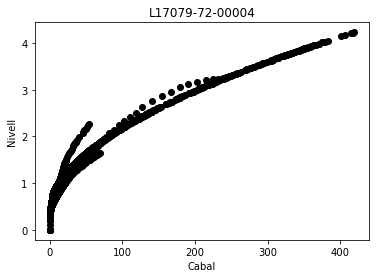

C:\Users\Sergi\AppData\Local\Temp\ipykernel_13264\4153671639.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df[stationName] < 0] = 0
C:\Users\Sergi\AppData\Local\Temp\ipykernel_13264\4153671639.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[df2[stationName] < 0] = 0


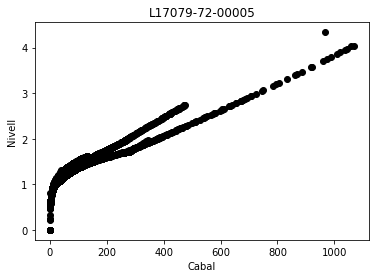

C:\Users\Sergi\AppData\Local\Temp\ipykernel_13264\4153671639.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df[stationName] < 0] = 0
C:\Users\Sergi\AppData\Local\Temp\ipykernel_13264\4153671639.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[df2[stationName] < 0] = 0


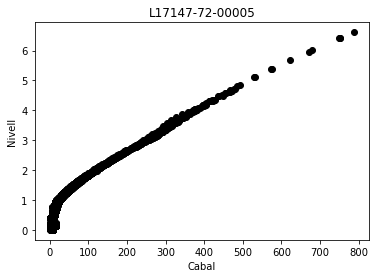

C:\Users\Sergi\AppData\Local\Temp\ipykernel_13264\4153671639.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df[stationName] < 0] = 0
C:\Users\Sergi\AppData\Local\Temp\ipykernel_13264\4153671639.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[df2[stationName] < 0] = 0


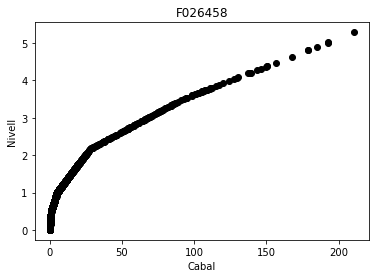

C:\Users\Sergi\AppData\Local\Temp\ipykernel_13264\4153671639.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df[stationName] < 0] = 0
C:\Users\Sergi\AppData\Local\Temp\ipykernel_13264\4153671639.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[df2[stationName] < 0] = 0


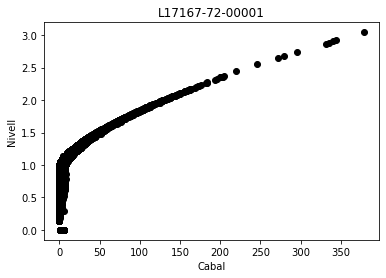

C:\Users\Sergi\AppData\Local\Temp\ipykernel_13264\4153671639.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df[stationName] < 0] = 0
C:\Users\Sergi\AppData\Local\Temp\ipykernel_13264\4153671639.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[df2[stationName] < 0] = 0


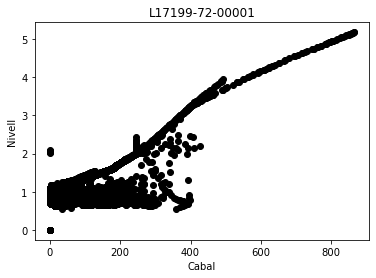

C:\Users\Sergi\AppData\Local\Temp\ipykernel_13264\4153671639.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df[stationName] < 0] = 0
C:\Users\Sergi\AppData\Local\Temp\ipykernel_13264\4153671639.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[df2[stationName] < 0] = 0


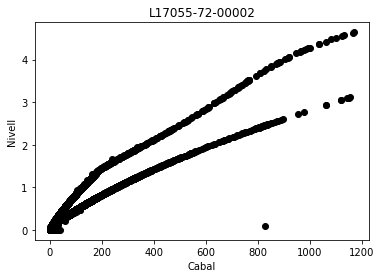

C:\Users\Sergi\AppData\Local\Temp\ipykernel_13264\4153671639.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df[stationName] < 0] = 0
C:\Users\Sergi\AppData\Local\Temp\ipykernel_13264\4153671639.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[df2[stationName] < 0] = 0


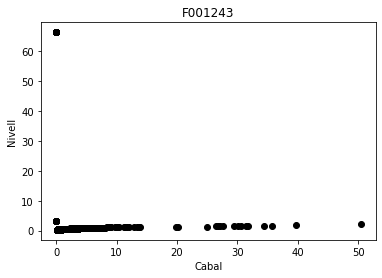

C:\Users\Sergi\AppData\Local\Temp\ipykernel_13264\4153671639.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df[stationName] < 0] = 0
C:\Users\Sergi\AppData\Local\Temp\ipykernel_13264\4153671639.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[df2[stationName] < 0] = 0


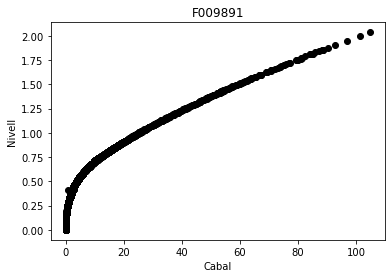

In [148]:
printStationPlot(cabalAux,"L17079-72-00004")
printStationPlot(cabalAux,"L17079-72-00005")
printStationPlot(cabalAux,"L17147-72-00005")
printStationPlot(cabalAux,"F026458")
printStationPlot(cabalAux,"L17167-72-00001")
printStationPlot(cabalAux,"L17199-72-00001")
printStationPlot(cabalAux,"L17055-72-00002")
printStationPlot(cabalAux,"F001243")
printStationPlot(cabalAux,"F009891")

In [150]:
cabalAux.to_excel("dataACA/Dataframes/DF_MovingAverageTOTALTractat_cabal_ACA.xlsx")

#### S'han fet obres al riu?

Tenim algunes estacions que sembla que hagin modificat el riu ja que es veuen dos funcions diferents en el mateix plot

In [151]:
cabalMovingAverage = pd.read_excel("dataACA/Dataframes/DF_MovingAverageTOTALTractat_cabal_ACA.xlsx", index_col=0)

C:\Users\Sergi\AppData\Local\Temp\ipykernel_13264\4153671639.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df[stationName] < 0] = 0
C:\Users\Sergi\AppData\Local\Temp\ipykernel_13264\4153671639.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[df2[stationName] < 0] = 0


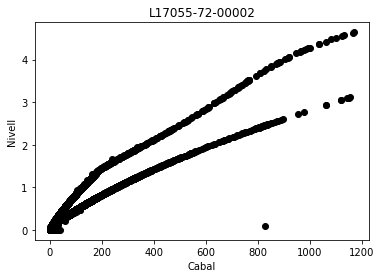

In [152]:
printStationPlot(cabalMovingAverage,"L17055-72-00002")

C:\Users\Sergi\AppData\Local\Temp\ipykernel_24156\3491655999.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[df2["L17055-72-00002"] < 0] = 0


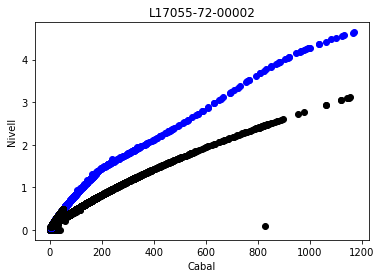

In [45]:
df = cabalMovingAverage[["L17055-72-00002"]]
df2 = nivell[["L17055-72-00002"]]

df2.loc[df2["L17055-72-00002"] < 0] = 0

df = df.rename(columns = {"L17055-72-00002":"L17055-72-00002_cabal"})
df2 = df2.rename(columns = {"L17055-72-00002":"L17055-72-00002_nivell"})

df = df2.combine_first(df)
final = df.dropna()

sector1 = final.loc[: "10/01/2010 00:30:00"] #black
X1 = sector1.iloc[:, :-1].values #cabal
y1 = sector1.iloc[:, 1].values #nivell

sector2 = final.loc["10/01/2010 01:00:00": "03/12/2011 00:30:00"] #blue
X2 = sector2.iloc[:, :-1].values #cabal
y2 = sector2.iloc[:, 1].values #nivell

sector3 = final.loc["03/12/2011 01:00:00":"09/16/2014 00:30:00" ] #black
X3 = sector3.iloc[:, :-1].values #cabal
y3 = sector3.iloc[:, 1].values #nivell

sector4 = final.loc["09/16/2014 01:00:00":"09/30/2014 00:00:00" ] #blue
X4 = sector4.iloc[:, :-1].values #cabal
y4 = sector4.iloc[:, 1].values #nivell

sector5 = final.loc["09/30/2014 00:30:00":"04/11/2018 13:30:00" ] #black
X5 = sector5.iloc[:, :-1].values #cabal
y5 = sector5.iloc[:, 1].values #nivell

sector6 = final.loc["04/11/2018 14:00:00":"05/13/2018 07:30:00" ] #blue
X6 = sector6.iloc[:, :-1].values #cabal
y6 = sector6.iloc[:, 1].values #nivell

sector7 = final.loc["05/13/2018 08:00:00":"10/23/2019 02:30:00" ] #black
X7 = sector7.iloc[:, :-1].values #cabal
y7 = sector7.iloc[:, 1].values #nivell

sector8 = final.loc["10/23/2019 03:00:00":"01/28/2020 00:00:00" ] #blue
X8 = sector8.iloc[:, :-1].values #cabal
y8 = sector8.iloc[:, 1].values #nivell

sector9 = final.loc["01/28/2020 00:30:00":"04/21/2020 00:00:00" ] #black
X9 = sector9.iloc[:, :-1].values #cabal
y9 = sector9.iloc[:, 1].values #nivell

sector10 = final.loc["04/21/2020 00:30:00": ] #blue
X10 = sector10.iloc[:, :-1].values #cabal
y10 = sector10.iloc[:, 1].values #nivell

plt.title("L17055-72-00002")
plt.xlabel('Cabal')
plt.ylabel('Nivell')

plt.scatter(X1, y1, color="black")
plt.scatter(X2, y2, color="blue")
plt.scatter(X3, y3, color="black")
plt.scatter(X4, y4, color="blue")
plt.scatter(X5, y5, color="black")
plt.scatter(X6, y6, color="blue")
plt.scatter(X7, y7, color="black")
plt.scatter(X8, y8, color="blue")
plt.scatter(X9, y9, color="black")
#plt.scatter(X10, y10, color="blue")

plt.show()

#### KNN Multiple imputation

https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html#sklearn.impute.IterativeImputer
https://scikit-learn.org/stable/modules/impute.html

In [27]:
cabalMovingAverage = pd.read_excel("dataACA/Dataframes/DF_MovingAverageTOTALTractat_cabal_ACA.xlsx", index_col=0)

In [66]:
myTable = PrettyTable(["Estació", "Numero de null's", "%", "Numero de nulls que podem omplir","%Nulls que podem"])
for stationName in (cabalMovingAverage.columns):
    # calculem quans nulls hi han
    n_miss = cabalMovingAverage[[stationName]].isnull().sum()
    # % de null's
    perc = n_miss / cabalMovingAverage.shape[0] * 100
    
    # mirem les vegades que a cabal hi ha null i a nivell no
    df = cabalMovingAverage[[stationName]]
    df2 = nivell[[stationName]]
    df = df.rename(columns = {stationName:stationName + "_cabal"})
    df2 = df2.rename(columns = {stationName:stationName + "_nivell"})
    df = df2.combine_first(df)
    mask = df[stationName + "_cabal"].isnull() & df[stationName + "_nivell"].notnull()
    # % de nulls que podem omplir
    percenNullsOmplir = len(df[mask]) * 100 / n_miss[0]
    
    myTable.add_row([stationName, n_miss[0],f"{perc[0]:.1f}", len(df[mask]),f"{percenNullsOmplir:.1f}"])
print(myTable)

+-----------------+------------------+------+----------------------------------+------------------+
|     Estació     | Numero de null's |  %   | Numero de nulls que podem omplir | %Nulls que podem |
+-----------------+------------------+------+----------------------------------+------------------+
|     F014672     |      118881      | 52.2 |               3900               |       3.3        |
| L17038-72-00002 |      22574       | 9.9  |               190                |       0.8        |
| L17079-72-00004 |       8195       | 3.6  |               351                |       4.3        |
| L17079-72-00005 |      23408       | 10.3 |               337                |       1.4        |
| L08116-72-00002 |      93244       | 40.9 |              26801               |       28.7       |
|     F001242     |      18277       | 8.0  |                38                |       0.2        |
| L17147-72-00005 |      25766       | 11.3 |              24884               |       96.6       |


Quants espais tenim plens a nivell però no a cabal?

In [24]:
def KNNRegressor(df,dfnivell, stationName):
    df_aux = df.copy()
    df_nivell_aux = dfnivell.copy()
    
    # agafem la columna nivell i cabal per la estació
    df_cabal = df_aux[[stationName]]
    df_nivell = df_nivell_aux[[stationName]]
    
    # ajuntem les columnes cabal i nivell en un df --> df_junt
    df_cabal = df_cabal.rename(columns = {stationName:stationName + "_cabal"})
    df_nivell = df_nivell.rename(columns = {stationName:stationName + "_nivell"})   
    df_nivell.loc[df_nivell[stationName + "_nivell"] < 0] = 0
    df_junt = df_nivell.combine_first(df_cabal)
    
    # a partir de la mascara selecionem les files que cabal es null però nivell no
    mask = df_junt[stationName + "_cabal"].isnull() & df_junt[stationName + "_nivell"].notnull()
    toFill = df_junt[mask]
    if(toFill.shape[0] == 0):
        return df_aux,toFill.shape[0]
    
    # agafem totes les files on tenim dades a cabal i nivell
    final = df_junt.dropna()
    X_train = final.iloc[:, 1].values #nivell
    y_train = final.iloc[:, :-1].values #cabal
    
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
    #print(knn.score(X_test, y_test))
    
    # creem el model knn i l'entranem
    knn = neighbors.KNeighborsRegressor(n_neighbors=7)
    X_train = X_train.reshape(-1, 1)
    knn.fit(X_train, y_train)
    
    # agafem els valors nivell del toFill df i predim a partir del nivell
    X_predict = toFill.iloc[:, 1].values #nivell
    X_predict = X_predict.reshape(-1, 1)
    y_predict = knn.predict(X_predict)
    
    # creem un df amb els cabals predits i els indexs corresponents 
    dfPredicted = pd.DataFrame(y_predict, columns = [stationName], index = toFill.index )
    
    # combinem el df inicial amb lo predit
    df_aux = df_aux.combine_first(dfPredicted)
    
    return df_aux, toFill.shape[0]

In [25]:
def KNNRegressorL17055_72_00002(df, dfnivell, stationName):
    df_aux = df.copy()
    df_nivell_aux = dfnivell.copy()

    # agafem la columna nivell i cabal per la estació
    df_cabal = df_aux[[stationName]]
    df_nivell = df_nivell_aux[[stationName]]
    
    # ajuntem les columnes cabal i nivell en un df --> df_junt
    df_cabal = df_cabal.rename(columns = {stationName:stationName + "_cabal"})
    df_nivell = df_nivell.rename(columns = {stationName:stationName + "_nivell"})   
    df_nivell.loc[df_nivell[stationName + "_nivell"] < 0] = 0
    df_junt = df_nivell.combine_first(df_cabal)
    
    sector1 = df_junt.loc[: "10/01/2010 00:30:00"] #black
    sector2 = df_junt.loc["10/01/2010 01:00:00": "03/12/2011 00:30:00"] #blue
    sector3 = df_junt.loc["03/12/2011 01:00:00":"09/16/2014 00:30:00" ] #black
    sector4 = df_junt.loc["09/16/2014 01:00:00":"09/30/2014 00:00:00" ] #blue
    sector5 = df_junt.loc["09/30/2014 00:30:00":"04/11/2018 13:30:00" ] #black
    sector6 = df_junt.loc["04/11/2018 14:00:00":"05/13/2018 07:30:00" ] #blue
    sector7 = df_junt.loc["05/13/2018 08:00:00":"10/23/2019 02:30:00" ] #black
    sector8 = df_junt.loc["10/23/2019 03:00:00":"01/28/2020 00:00:00" ] #blue
    sector9 = df_junt.loc["01/28/2020 00:30:00":"04/21/2020 00:00:00" ] #black
    sector10 = df_junt.loc["04/21/2020 00:30:00": ] #blue
    
    frames1 = [sector1, sector3, sector5,sector7,sector9]
    BlackData = pd.concat(frames1)
    frames2 = [sector2, sector4, sector6,sector8,sector10]
    BlueData = pd.concat(frames2)

    # a partir de la mascara selecionem les files que cabal es null però nivell no
    mask = df_junt[stationName + "_cabal"].isnull() & df_junt[stationName + "_nivell"].notnull()
    toFilljunt = df_junt[mask]
    if(toFilljunt.shape[0] == 0):
        return df_aux, toFilljunt.shape[0]
    
    sector1 = toFilljunt.loc[: "10/01/2010 00:30:00"] #black
    sector2 = toFilljunt.loc["10/01/2010 01:00:00": "03/12/2011 00:30:00"] #blue
    sector3 = toFilljunt.loc["03/12/2011 01:00:00":"09/16/2014 00:30:00" ] #black
    sector4 = toFilljunt.loc["09/16/2014 01:00:00":"09/30/2014 00:00:00" ] #blue
    sector5 = toFilljunt.loc["09/30/2014 00:30:00":"04/11/2018 13:30:00" ] #black
    sector6 = toFilljunt.loc["04/11/2018 14:00:00":"05/13/2018 07:30:00" ] #blue
    sector7 = toFilljunt.loc["05/13/2018 08:00:00":"10/23/2019 02:30:00" ] #black
    sector8 = toFilljunt.loc["10/23/2019 03:00:00":"01/28/2020 00:00:00" ] #blue
    sector9 = toFilljunt.loc["01/28/2020 00:30:00":"04/21/2020 00:00:00" ] #black
    sector10 = toFilljunt.loc["04/21/2020 00:30:00": ] #blue
    
    frames1 = [sector1, sector3, sector5,sector7,sector9]
    BlackDataToFill = pd.concat(frames1)
    frames2 = [sector2, sector4, sector6,sector8,sector10]
    BlueDataToFill = pd.concat(frames2)
    
    
    # agafem totes les files on tenim dades a cabal i nivell
    BlackDatafinal = BlackData.dropna()
    BlackDataX_train = BlackDatafinal.iloc[:, 1].values #nivell
    BlackDatay_train = BlackDatafinal.iloc[:, :-1].values #cabal
    
    BlueDatafinal = BlueData.dropna()
    BlueDataX_train = BlueDatafinal.iloc[:, 1].values #nivell
    BlueDatay_train = BlueDatafinal.iloc[:, :-1].values #cabal
    
    # creem el model knn i l'entranem
    knnBlack = neighbors.KNeighborsRegressor(n_neighbors=7)
    BlackDataX_train = BlackDataX_train.reshape(-1, 1)
    knnBlack.fit(BlackDataX_train, BlackDatay_train)
    
    knnBlue = neighbors.KNeighborsRegressor(n_neighbors=7)
    BlueDataX_train = BlueDataX_train.reshape(-1, 1)
    knnBlue.fit(BlueDataX_train, BlueDatay_train)
    
    # agafem els valors nivell del toFill df i predim a partir del nivell
    X_predictBlack = BlackDataToFill.iloc[:, 1].values #nivell
    X_predictBlack = X_predictBlack.reshape(-1, 1)
    y_predictBlack = knnBlack.predict(X_predictBlack)
    
    X_predictBlue = BlueDataToFill.iloc[:, 1].values #nivell
    X_predictBlue = X_predictBlue.reshape(-1, 1)
    y_predictBlue = knnBlue.predict(X_predictBlue)
    
    # creem un df amb els cabals predits i els indexs corresponents 
    dfPredictedBlack = pd.DataFrame(y_predictBlack, columns = [stationName], index = BlackDataToFill.index )
    dfPredictedBlue = pd.DataFrame(y_predictBlue, columns = [stationName], index = BlueDataToFill.index )
    frames = [dfPredictedBlack, dfPredictedBlue]
    dfPredictedBlackBlue = pd.concat(frames)

    # combinem el df inicial amb lo predit
    df_aux = df_aux.combine_first(dfPredictedBlackBlue)
    
    return df_aux, toFilljunt.shape[0]

In [28]:
start = timeit.default_timer()
cabalknnimputation = cabalMovingAverage.copy()
for stationName in cabalknnimputation.columns:
    # x+1 perque range comença a 0
    if (stationName != "L17055-72-00002"):
        cabalknnimputation,num = KNNRegressor(cabalknnimputation,nivell, stationName)
    else: 
        cabalknnimputation,num = KNNRegressorL17055_72_00002(cabalknnimputation,nivell, stationName)
        print("##",stationName,"##")
        
stop = timeit.default_timer()        
print('Time: ', stop - start) 

## L17055-72-00002 ##
Time:  3.984121800000139


In [70]:
cabalknnimputation

,F000005,F001242,F001243,F009891,F014672,F026458,L08116-72-00002,L17038-72-00002,L17055-72-00002,L17079-72-00004,L17079-72-00005,L17147-72-00005,L17167-72-00001,L17199-72-00001
DATA,,,,,,,,,,,,,,
2009-01-01 00:00:00,0.629029,4.036000,1.206,NaN,NaN,0.718,36.542429,3.892,0.0,0.98,8.677000,15.686286,8.191793,NaN
2009-01-01 00:30:00,0.688714,4.036000,1.206,NaN,NaN,0.718,36.940714,3.868,0.0,0.98,8.865000,15.686286,8.191793,NaN
2009-01-01 01:00:00,0.688714,4.036000,1.181,NaN,NaN,0.718,36.940714,3.844,0.0,0.98,8.865000,15.686286,8.191793,NaN
2009-01-01 01:30:00,0.688714,4.036000,1.181,NaN,NaN,0.718,38.402109,3.820,0.0,0.98,8.865000,15.686286,8.191793,NaN
2009-01-01 02:00:00,0.688714,4.059000,1.181,NaN,NaN,0.715,41.719571,3.784,0.0,0.98,8.771000,15.686286,11.432857,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31 22:00:00,NaN,6.017264,NaN,NaN,NaN,NaN,4.881057,NaN,NaN,NaN,3.126590,3.642061,NaN,6.320519
2021-12-31 22:30:00,NaN,6.017264,NaN,NaN,NaN,NaN,4.849859,NaN,NaN,NaN,3.114633,3.688313,NaN,6.320107
2021-12-31 23:00:00,NaN,6.017264,NaN,NaN,NaN,NaN,4.747017,NaN,NaN,NaN,3.114633,3.642061,NaN,6.031444


In [71]:
myTable = PrettyTable(["Estació", "Numero de null's", "%", "Numero de nulls que podem omplir","%Nulls que podem"])
for stationName in (cabalknnimputation.columns):
    # calculem quans nulls hi han
    n_miss = cabalknnimputation[[stationName]].isnull().sum()
    # % de null's
    perc = n_miss / cabalknnimputation.shape[0] * 100
    
    # mirem les vegades que a cabal hi ha null i a nivell no
    df = cabalknnimputation[[stationName]]
    df2 = nivell[[stationName]]
    df = df.rename(columns = {stationName:stationName + "_cabal"})
    df2 = df2.rename(columns = {stationName:stationName + "_nivell"})
    df = df2.combine_first(df)
    mask = df[stationName + "_cabal"].isnull() & df[stationName + "_nivell"].notnull()
    # % de nulls que podem omplir
    percenNullsOmplir = len(df[mask]) * 100 / n_miss[0]
    
    myTable.add_row([stationName, n_miss[0],f"{perc[0]:.1f}", len(df[mask]),f"{percenNullsOmplir:.1f}"])
print(myTable)

+-----------------+------------------+------+----------------------------------+------------------+
|     Estació     | Numero de null's |  %   | Numero de nulls que podem omplir | %Nulls que podem |
+-----------------+------------------+------+----------------------------------+------------------+
|     F000005     |      169050      | 74.2 |                0                 |       0.0        |
|     F001242     |      18239       | 8.0  |                0                 |       0.0        |
|     F001243     |      176499      | 77.4 |                0                 |       0.0        |
|     F009891     |      165382      | 72.6 |                0                 |       0.0        |
|     F014672     |      114981      | 50.5 |                0                 |       0.0        |
|     F026458     |      22535       | 9.9  |                0                 |       0.0        |
| L08116-72-00002 |      66443       | 29.2 |                0                 |       0.0        |


### Moving average

In [17]:
NUMNULLPUT = 0
ARRAYNULLPUT = []
def MovingAverageApplyer(x):
    global NUMNULLPUT, ARRAYNULLPUT
    
    xNumpy = x.to_numpy()
    middle = int(len(xNumpy) / 2)
    valorMitg = xNumpy[middle]
    AuxXNumpy = np.copy(xNumpy)
    AuxXNumpy[middle]= np.nan
    numMultVarStr = 20

    if( np.sum(np.isnan(AuxXNumpy)) > len(AuxXNumpy)/3 ):
        return valorMitg
    
    if(valorMitg > (np.nanmean(AuxXNumpy) + numMultVarStr * np.nanstd(AuxXNumpy)) or valorMitg < (np.nanmean(AuxXNumpy) - numMultVarStr * np.nanstd(AuxXNumpy)) ):
        xFrame = x.to_frame()
        concatString = str(valorMitg) + " > " + str((np.nanmean(AuxXNumpy) + numMultVarStr * np.nanstd(AuxXNumpy))) + " OR " + str(valorMitg) + " < " + str((np.nanmean(AuxXNumpy) - numMultVarStr * np.nanstd(AuxXNumpy))) + " ## " + str(xFrame.iloc[middle].name) + " nanmean= " + str(np.nanmean(AuxXNumpy)) + " std= " + str(np.nanstd(AuxXNumpy)) + " ##"
        ARRAYNULLPUT.append(concatString)
        NUMNULLPUT += 1
        return np.nan
    
    return valorMitg

def MovingAverageRolling(station,df,windowNumber):
    global NUMNULLPUT, ARRAYNULLPUT
    NUMNULLPUT = 0
    ARRAYNULLPUT = []
    
    #la window number ha de ser senar
    if (windowNumber%2==0):
        windowNumber += 1
    
    dfcopy = df.copy()
    
    #agafem la columna station
    dfaux = dfcopy[[station]]
    
    numNotNull = dfaux.notnull().sum()
    
    #recorro el df aplicant el moving average
    dfrolling = dfaux.rolling(window = windowNumber ,min_periods=1,center = True).apply(MovingAverageApplyer)
    
    fixedForeach = int(windowNumber/2)
    tailaux = dfaux.tail(fixedForeach)
    headaux = dfaux.head(fixedForeach)
    
    dataFrameFinal= tailaux.combine_first(headaux.combine_first(dfrolling))
    dfcopy[station] = dataFrameFinal
    
    return dfcopy, NUMNULLPUT, ARRAYNULLPUT, numNotNull

In [5]:
start = timeit.default_timer()
arrayStations =['F014672', 'L17038-72-00002', 'L17079-72-00004', 'L17079-72-00005',
       'L08116-72-00002', 'F001242', 'L17147-72-00005', 'F026458',
       'L17167-72-00001', 'L17199-72-00001', 'L17055-72-00002', 'F001243',
       'F000005', 'F009891']

myTable = PrettyTable(["Estació", "Null's posats", "Num valors"])
logsMovingAverage= {}


for station in arrayStations:
    cabalMovingAverage, nullnum, logs, numNotNull = MovingAverageRolling(station,cabalMovingAverage,21)
    myTable.add_row([station, nullnum, numNotNull[0]])
    logsMovingAverage[station] = logs
    
    
stop = timeit.default_timer()
print('Time: ', str(datetime.timedelta(seconds=(stop-start))))  

Time:  534.0607265


In [6]:
myTable

Estació,Null's posats,Num valors
F014672,9,109024
L17038-72-00002,23,205331
L17079-72-00004,90,219710
L17079-72-00005,35,204497
L08116-72-00002,14,134661
F001242,75,209628
L17147-72-00005,59,202139
F026458,312,205069
L17167-72-00001,21,198393
L17199-72-00001,99,216533


In [7]:
logsMovingAverage

{'F014672': ['1.0237 > 0.5817768473992138 OR 1.0237 < -0.05261684739921374 ## 2011-07-02 16:30:00 nanmean= 0.26458 std= 0.015859842369960686 ##',
  '0.0042 > 0.0 OR 0.0042 < 0.0 ## 2012-08-19 17:00:00 nanmean= 0.0 std= 0.0 ##',
  '0.001 > 0.0 OR 0.001 < 0.0 ## 2015-07-06 07:00:00 nanmean= 0.0 std= 0.0 ##',
  '0.003 > 0.0 OR 0.003 < 0.0 ## 2015-07-08 16:00:00 nanmean= 0.0 std= 0.0 ##',
  '0.006 > 0.0 OR 0.006 < 0.0 ## 2015-07-20 17:00:00 nanmean= 0.0 std= 0.0 ##',
  '0.001 > 0.0 OR 0.001 < 0.0 ## 2015-07-21 13:00:00 nanmean= 0.0 std= 0.0 ##',
  '0.799 > 0.0 OR 0.799 < 0.0 ## 2020-07-03 09:30:00 nanmean= 0.0 std= 0.0 ##',
  '0.262 > 0.0 OR 0.262 < 0.0 ## 2020-07-07 14:00:00 nanmean= 0.0 std= 0.0 ##',
  '173.115 > 44.10167017680124 OR 173.115 < -42.40847017680124 ## 2020-08-03 10:00:00 nanmean= 0.8465999999999999 std= 2.162753508840062 ##'],
 'L17038-72-00002': ['3.012 > 3.9358981158462316 OR 3.012 < 3.293701884153768 ## 2009-02-09 13:30:00 nanmean= 3.6148 std= 0.016054905792311596 ##',
 

### Iteracions final

Valors incomprensibles --> MovingAverage --> Interpolació -->  KNN --> Iterative Imputer

(MovingAverage--> Interpolació --> KNN ) * x  --> Iterative Imputer

#### (MovingAverage--> Interpolació --> KNN ) * x

In [23]:
def printNull(cabal):
    myTable = PrettyTable(["Estació", "Numero de null's", "%"])
    for stationName in (cabal.columns):
        # calculem quans nulls hi han
        n_miss = cabal[[stationName]].isnull().sum()
        # % de null's
        perc = n_miss / cabal.shape[0] * 100
        myTable.add_row([stationName, n_miss[0],f"{perc[0]:.1f}"])
    return(myTable)

In [113]:
def printNull2(cabal1,cabal2):
    myTable = PrettyTable(["Estació", "1 Numero de null's", "1 %","2 Numero de null's","2 %"])
    for stationName in (cabal.columns):
        # calculem quans nulls hi han
        n_miss = cabal1[[stationName]].isnull().sum()
        n_miss2 = cabal2[[stationName]].isnull().sum()

        # % de null's
        perc = n_miss / cabal1.shape[0] * 100
        perc2 = n_miss2 / cabal2.shape[0] * 100
        myTable.add_row([stationName, n_miss[0],f"{perc[0]:.1f}", n_miss2[0],f"{perc2[0]:.1f}"])
    return(myTable)

In [160]:
def modelIteration(numIter, dfCabal, dfNivell):
    start = timeit.default_timer()
    
    dfCabalAux = dfCabal.copy()
    dfNivellAux = dfNivell.copy()
    
    myTable = PrettyTable(["Iteració","Fase","Estació", "Null's posats", "Num valors posats","Temps en execució"])

    arrayStations =['F014672', 'L17038-72-00002', 'L17079-72-00004', 'L17079-72-00005',
       'L08116-72-00002', 'F001242', 'L17147-72-00005', 'F026458',
       'L17167-72-00001', 'L17199-72-00001', 'L17055-72-00002', 'F001243',
       'F000005', 'F009891']
    
    # Primera iteració
    
        #Valors incomprensibles
    movingAverageResolverTotal(dfCabalAux,"L17079-72-00004",26,True,False)
    movingAverageResolverTotal(dfCabalAux,"L17079-72-00005",41,True,False)
    movingAverageResolverTotal(dfCabalAux,"L17147-72-00005",3.5,True,False)
    movingAverageResolverTotal(dfCabalAux,"F026458",74,True,False)
    movingAverageResolverTotal(dfCabalAux,"L17167-72-00001",6.5,True,False)
    movingAverageResolverTotal(dfCabalAux,"L17199-72-00001",28,True,False)
    movingAverageResolverTotal(dfCabalAux,"L17055-72-00002",28,True,False)
    movingAverageResolverTotal(dfCabalAux,"F001243",8,True,False)
    movingAverageResolverTotal(dfCabalAux,"F009891",19,True,False)
    
    
        # Moving Average
    for station in arrayStations:
        start1 = timeit.default_timer()
        dfCabalAux, nullnum, logs, numNotNull = MovingAverageRolling(station,dfCabalAux,21)
        stop1 = timeit.default_timer()
        myTable.add_row(["0","Moving average",station, nullnum, "-",str(datetime.timedelta(seconds=(stop1-start1)))])
        
    #for station in arrayStations:
    #    dfNivellAux, nullnum, logs, numNotNull = MovingAverageRolling(station,dfNivellAux,21)
    #    myTable.add_row(["0","Moving average",station, nullnum, "-"])
    
    
        # Interpolació --> fins a 5 nulls
    for x in range(5):
        for station in arrayStations:
            start1 = timeit.default_timer()
            # x+1 perque range comença a 0
            dfCabalAux, numPosats = interpolateOneValue(station,dfCabalAux,makePattern(x+1))
            stop1 = timeit.default_timer()
            titleFase = "Interpolació Cabal -> " + str(x+1)
            myTable.add_row(["0",titleFase ,station, "",numPosats ,str(datetime.timedelta(seconds=(stop1-start1)))])
            
    for x in range(5):
        for station in arrayStations:
            # x+1 perque range comença a 0
            start1 = timeit.default_timer()
            dfNivellAux, numPosats = interpolateOneValue(station,dfNivellAux,makePattern(x+1))
            stop1 = timeit.default_timer()
            titleFase = "Interpolació Nivell -> " + str(x+1)
            myTable.add_row(["0",titleFase ,station, "-", numPosats,str(datetime.timedelta(seconds=(stop1-start1)))])
    

        # KNN
    for station in arrayStations:
        start1 = timeit.default_timer()
        if (station != "L17055-72-00002"):
            dfCabalAux, num = KNNRegressor(dfCabalAux, dfNivellAux, station)
        else: 
            dfCabalAux, num = KNNRegressorL17055_72_00002(dfCabalAux, dfNivellAux, station)
        stop1 = timeit.default_timer()
        myTable.add_row(["0","KNN",station, "", num ,str(datetime.timedelta(seconds=(stop1-start1)))])        

    
    # Iteració x
    for x in range(numIter):
            # Moving Average
        for station in arrayStations:
            start1 = timeit.default_timer()
            dfCabalAux, nullnum, logs, numNotNull = MovingAverageRolling(station,dfCabalAux,21)
            stop1 = timeit.default_timer()
            myTable.add_row([x+1,"Moving average",station, nullnum, "-",str(datetime.timedelta(seconds=(stop1-start1)))])

        #for station in arrayStations:
        #    dfNivellAux, nullnum, logs, numNotNull = MovingAverageRolling(station,dfNivellAux,21)
        #    myTable.add_row(["0","Moving average",station, nullnum, "-"])


            # Interpolació --> fins a 5 nulls
        for y in range(5):
            for station in arrayStations:
                start1 = timeit.default_timer()
                # x+1 perque range comença a 0
                dfCabalAux, numPosats = interpolateOneValue(station,dfCabalAux,makePattern(y+1))
                stop1 = timeit.default_timer()
                titleFase = "Interpolació Cabal -> " + str(y+1)
                myTable.add_row([x+1,titleFase ,station, "",numPosats ,str(datetime.timedelta(seconds=(stop1-start1)))])

        for y in range(5):
            for station in arrayStations:
                # x+1 perque range comença a 0
                start1 = timeit.default_timer()
                dfNivellAux, numPosats = interpolateOneValue(station,dfNivellAux,makePattern(y+1))
                stop1 = timeit.default_timer()
                titleFase = "Interpolació Nivell -> " + str(y+1)
                myTable.add_row([x+1,titleFase ,station, "-", numPosats,str(datetime.timedelta(seconds=(stop1-start1)))])


            # KNN
        for station in arrayStations:
            start1 = timeit.default_timer()
            if (station != "L17055-72-00002"):
                dfCabalAux, num = KNNRegressor(dfCabalAux, dfNivellAux, station)
            else: 
                dfCabalAux, num = KNNRegressorL17055_72_00002(dfCabalAux, dfNivellAux, station)
            stop1 = timeit.default_timer()
            myTable.add_row([x+1,"KNN",station, "", num ,str(datetime.timedelta(seconds=(stop1-start1)))])        

        
    stop = timeit.default_timer()
    print(myTable)
    print("Time: ", str(datetime.timedelta(seconds=(stop-start))))
    return dfCabalAux , dfNivellAux

In [115]:
cabal = pd.read_excel("dataACA/Dataframes/DF_noTractat_cabal_ACA.xlsx", index_col=0)
nivell = pd.read_excel("dataACA/Dataframes/DF_noTractat_nivell_ACA.xlsx", index_col=0)

In [205]:
printNull(cabal)

Estació,Numero de null's,%
F014672,129461,56.8
L17038-72-00002,22754,10.0
L17079-72-00004,8208,3.6
L17079-72-00005,23720,10.4
L08116-72-00002,93371,41.0
F001242,18468,8.1
L17147-72-00005,25711,11.3
F026458,23014,10.1
L17167-72-00001,29528,13.0
L17199-72-00001,11781,5.2


In [212]:
dfCabalIterations, dfNivellIterations  = modelIteration(0, cabal, nivell)

C:\Users\Sergi\AppData\Local\Temp\ipykernel_24156\3489548116.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unionDf.loc[unionDf[station] < 0] = 0
C:\Users\Sergi\AppData\Local\Temp\ipykernel_24156\3489548116.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unionDf.loc[unionDf[station] < 0] = 0
C:\Users\Sergi\AppData\Local\Temp\ipykernel_24156\3489548116.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unionDf.loc[unionDf[s

+----------+--------------------------+-----------------+---------------+-------------------+-------------------+
| Iteració |           Fase           |     Estació     | Null's posats | Num valors posats | Temps en execució |
+----------+--------------------------+-----------------+---------------+-------------------+-------------------+
|    0     |      Moving average      |     F014672     |       9       |         -         |   0:00:23.255894  |
|    0     |      Moving average      | L17038-72-00002 |       23      |         -         |   0:00:51.227111  |
|    0     |      Moving average      | L17079-72-00004 |       91      |         -         |   0:00:55.283224  |
|    0     |      Moving average      | L17079-72-00005 |       36      |         -         |   0:00:51.189788  |
|    0     |      Moving average      | L08116-72-00002 |       14      |         -         |   0:00:33.570578  |
|    0     |      Moving average      |     F001242     |       75      |         -     

In [221]:
dfCabalIterationsOrdenat = dfCabalIterations[['F014672', 'L17038-72-00002', 'L17079-72-00004', 'L17079-72-00005',
       'L08116-72-00002', 'F001242', 'L17147-72-00005', 'F026458',
       'L17167-72-00001', 'L17199-72-00001', 'L17055-72-00002', 'F001243',
       'F000005', 'F009891']]
dfNivellIterationsOrdenat = dfNivellIterations[['F014672', 'L17038-72-00002', 'L17079-72-00004', 'L17079-72-00005',
       'L08116-72-00002', 'F001242', 'L17147-72-00005', 'F026458',
       'L17167-72-00001', 'L17199-72-00001', 'L17055-72-00002', 'F001243',
       'F000005', 'F009891']]

In [222]:
dfCabalIterationsOrdenat.to_excel("dataACA/Dataframes/dfCabalIterations_1_cabal_ACA.xlsx")
dfNivellIterationsOrdenat.to_excel("dataACA/Dataframes/dfNivellIterations_1_nivell_ACA.xlsx")

In [213]:
printNull(dfCabalIterations)

Estació,Numero de null's,%
F000005,169050,74.2
F001242,18239,8.0
F001243,176500,77.4
F009891,165382,72.6
F014672,114981,50.5
F026458,22536,9.9
L08116-72-00002,66443,29.2
L17038-72-00002,22384,9.8
L17055-72-00002,43571,19.1
L17079-72-00004,7845,3.4


In [215]:
printNull2(cabal,dfCabalIterations)

Estació,1 Numero de null's,1 %,2 Numero de null's,2 %
F014672,129461,56.8,114981,50.5
L17038-72-00002,22754,10.0,22384,9.8
L17079-72-00004,8208,3.6,7845,3.4
L17079-72-00005,23720,10.4,23071,10.1
L08116-72-00002,93371,41.0,66443,29.2
F001242,18468,8.1,18239,8.0
L17147-72-00005,25711,11.3,883,0.4
F026458,23014,10.1,22536,9.9
L17167-72-00001,29528,13.0,1840,0.8
L17199-72-00001,11781,5.2,11354,5.0


In [216]:
printNull2(nivell,dfNivellIterations)

Estació,1 Numero de null's,1 %,2 Numero de null's,2 %
F014672,125563,55.1,114766,50.4
L17038-72-00002,22608,9.9,22421,9.8
L17079-72-00004,8027,3.5,7896,3.5
L17079-72-00005,23488,10.3,23171,10.2
L08116-72-00002,66553,29.2,66448,29.2
F001242,124487,54.6,124353,54.6
L17147-72-00005,1017,0.4,879,0.4
F026458,22758,10.0,22571,9.9
L17167-72-00001,1992,0.9,1847,0.8
L17199-72-00001,52305,23.0,51948,22.8


In [161]:
dfCabalIterations, dfNivellIterations  = modelIteration(4, cabal, nivell)

C:\Users\Sergi\AppData\Local\Temp\ipykernel_19316\3489548116.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unionDf.loc[unionDf[station] < 0] = 0
C:\Users\Sergi\AppData\Local\Temp\ipykernel_19316\3489548116.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unionDf.loc[unionDf[station] < 0] = 0
C:\Users\Sergi\AppData\Local\Temp\ipykernel_19316\3489548116.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unionDf.loc[unionDf[s

+----------+--------------------------+-----------------+---------------+-------------------+-------------------+
| Iteració |           Fase           |     Estació     | Null's posats | Num valors posats | Temps en execució |
+----------+--------------------------+-----------------+---------------+-------------------+-------------------+
|    0     |      Moving average      |     F014672     |       9       |         -         |   0:00:24.200194  |
|    0     |      Moving average      | L17038-72-00002 |       23      |         -         |   0:00:53.874779  |
|    0     |      Moving average      | L17079-72-00004 |       91      |         -         |   0:00:58.861433  |
|    0     |      Moving average      | L17079-72-00005 |       36      |         -         |   0:00:55.928651  |
|    0     |      Moving average      | L08116-72-00002 |       14      |         -         |   0:00:34.482499  |
|    0     |      Moving average      |     F001242     |       75      |         -     

In [162]:
dfCabalIterationsOrdenat = dfCabalIterations[['F014672', 'L17038-72-00002', 'L17079-72-00004', 'L17079-72-00005',
       'L08116-72-00002', 'F001242', 'L17147-72-00005', 'F026458',
       'L17167-72-00001', 'L17199-72-00001', 'L17055-72-00002', 'F001243',
       'F000005', 'F009891']]
dfNivellIterationsOrdenat = dfNivellIterations[['F014672', 'L17038-72-00002', 'L17079-72-00004', 'L17079-72-00005',
       'L08116-72-00002', 'F001242', 'L17147-72-00005', 'F026458',
       'L17167-72-00001', 'L17199-72-00001', 'L17055-72-00002', 'F001243',
       'F000005', 'F009891']]

In [163]:
dfCabalIterationsOrdenat.to_excel("dataACA/Dataframes/dfCabalIterations_X_cabal_ACA.xlsx")
dfNivellIterationsOrdenat.to_excel("dataACA/Dataframes/dfNivellIterations_X_nivell_ACA.xlsx")

In [164]:
printNull2(cabal,dfCabalIterationsOrdenat)

Estació,1 Numero de null's,1 %,2 Numero de null's,2 %
F014672,129461,56.8,114673,50.3
L17038-72-00002,22754,10.0,22306,9.8
L17079-72-00004,8208,3.6,7791,3.4
L17079-72-00005,23720,10.4,22958,10.1
L08116-72-00002,93371,41.0,66404,29.1
F001242,18468,8.1,18155,8.0
L17147-72-00005,25711,11.3,813,0.4
F026458,23014,10.1,22456,9.9
L17167-72-00001,29528,13.0,1789,0.8
L17199-72-00001,11781,5.2,11148,4.9


#### Iterative Imputer

In [19]:
df_iter = pd.read_excel("dataACA/Dataframes/dfCabalIterations_X_cabal_ACA.xlsx", index_col=0)

Em carrego unes estacions amb un % de nulls alt:
- F009891	--> torelló riu ges 			alt ter   72% null

- F000005 --> ginestar riera llemana	 baix ter reee	74% null

- F001243	--> corrnella terri             baix ter banyoles  77.1 % null

- F014672 --> anglès riera d'osor    baix ter despres de pasteral  50% null

In [20]:
df_iter = df_iter.loc["01/01/2009  0:00:00": "01/01/2021  0:00:00"] #blue
total_iter = df_iter[['L17038-72-00002', 'L17079-72-00004', 'L17079-72-00005','L08116-72-00002', 'F001242', 'L17147-72-00005', 'F026458',
       'L17167-72-00001', 'L17199-72-00001', 'L17055-72-00002']]
AltTer_iter = total_iter[['L08116-72-00002', 'L17147-72-00005','L17167-72-00001']]
BaixTer_iter = total_iter[['L17038-72-00002', 'L17079-72-00004', 'L17079-72-00005', 'F001242', 'F026458','L17199-72-00001', 'L17055-72-00002']]

In [24]:
printNull(BaixTer_iter)

Estació,Numero de null's,%
L17038-72-00002,9106,4.3
L17079-72-00004,446,0.2
L17079-72-00005,22958,10.9
F001242,18155,8.6
F026458,9256,4.4
L17199-72-00001,11131,5.3
L17055-72-00002,25887,12.3


In [25]:
printNull(AltTer_iter)

Estació,Numero de null's,%
L08116-72-00002,66395,31.6
L17147-72-00005,803,0.4
L17167-72-00001,348,0.2


------------------------------------------------------------ Iterative Imputer ----------------------------------------

In [22]:
start = timeit.default_timer()

#imputerTotal = IterativeImputer(random_state=42)
#imputedTotal = imputerTotal.fit_transform(total_iter)

imputerAltTer = IterativeImputer(random_state=42,estimator=KNeighborsRegressor(),max_iter=100)
imputedAltTer = imputerAltTer.fit_transform(AltTer_iter)

imputerBaixTer = IterativeImputer(random_state=42,estimator=KNeighborsRegressor(),max_iter=100)
imputedBaixTer = imputerBaixTer.fit_transform(BaixTer_iter)

stop = timeit.default_timer()
print("Time: ", str(datetime.timedelta(seconds=(stop-start))))

C:\Users\Sergi\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Time:  0:09:43.938693


C:\Users\Sergi\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [29]:
#df_imputedTotal = pd.DataFrame(imputedTotal,columns=['L17038-72-00002', 'L17079-72-00004', 'L17079-72-00005',
#       'L08116-72-00002', 'F001242', 'L17147-72-00005', 'F026458',
#       'L17167-72-00001', 'L17199-72-00001', 'L17055-72-00002'],index=pd.date_range("2009-01-01", periods=210385, freq="30T"))
df_imputedAltTer = pd.DataFrame(imputedAltTer,columns=['L08116-72-00002', 'L17147-72-00005','L17167-72-00001'],index=pd.date_range("2009-01-01", periods=210385, freq="30T"))
df_imputedAltTer.index.name = "DATA"

df_imputedBaixTer = pd.DataFrame(imputedBaixTer,columns=['L17038-72-00002', 'L17079-72-00004', 'L17079-72-00005', 'F001242', 'F026458','L17199-72-00001', 'L17055-72-00002'],index=pd.date_range("2009-01-01", periods=210385, freq="30T"))
df_imputedBaixTer.index.name = "DATA"

In [31]:
#df_imputedTotal.to_excel("dataACA/Dataframes/df_imputedTotal.xlsx")
df_imputedAltTer.to_excel("dataACA/Dataframes/df_imputedAltTer.xlsx")
df_imputedBaixTer.to_excel("dataACA/Dataframes/df_imputedBaixTer.xlsx")

------------------------------------------------------------------------ KNN Imputer -------------------------------------

In [15]:
start = timeit.default_timer()

#imputerTotalKNN = KNNImputer(n_neighbors=6)
#imputedTotalKNN = imputerTotalKNN.fit_transform(total_iter)
#df_imputedTotalKNN = pd.DataFrame(imputedTotalKNN,columns=['L17038-72-00002', 'L17079-72-00004', 'L17079-72-00005',
#       'L08116-72-00002', 'F001242', 'L17147-72-00005', 'F026458',
#       'L17167-72-00001', 'L17199-72-00001', 'L17055-72-00002'],index=pd.date_range("2009-01-01", periods=210385, freq="30T"))
imputerAltTerKNN = KNNImputer(n_neighbors=6)
imputedAltTerKNN = imputerAltTerKNN.fit_transform(AltTer_iter)
df_imputedAltTerKNN = pd.DataFrame(imputedAltTerKNN,columns=['L08116-72-00002', 'L17147-72-00005','L17167-72-00001'],index=pd.date_range("2009-01-01", periods=210385, freq="30T"))
df_imputedAltTerKNN.index.name = "DATA"

imputerBaixTerKNN = KNNImputer(n_neighbors=6)
imputedBaixTerKNN = imputerBaixTerKNN.fit_transform(BaixTer_iter)
df_imputedBaixTerKNN = pd.DataFrame(imputedBaixTerKNN,columns=['L17038-72-00002', 'L17079-72-00004', 'L17079-72-00005', 'F001242', 'F026458','L17199-72-00001', 'L17055-72-00002'],index=pd.date_range("2009-01-01", periods=210385, freq="30T"))
df_imputedBaixTerKNN.index.name = "DATA"

stop = timeit.default_timer()
print("Time: ", str(datetime.timedelta(seconds=(stop-start))))
#30'

Time:  0:00:00.007605


In [17]:
#df_imputedTotalKNN.to_excel("dataACA/Dataframes/df_imputedTotalKNN.xlsx")
df_imputedAltTerKNN.to_excel("dataACA/Dataframes/df_imputedAltTerKNN.xlsx")
df_imputedBaixTerKNN.to_excel("dataACA/Dataframes/df_imputedBaixTerKNN.xlsx")

In [18]:
df_imputedAltTerKNN

,L08116-72-00002,L17147-72-00005,L17167-72-00001
DATA,,,
2009-01-01 00:00:00,36.542429,15.686286,8.954793
2009-01-01 00:30:00,36.940714,15.686286,8.954793
2009-01-01 01:00:00,36.940714,15.686286,8.954793
2009-01-01 01:30:00,38.402109,15.686286,8.954793
2009-01-01 02:00:00,41.719571,15.686286,10.976429
...,...,...,...
2020-12-31 22:00:00,6.696000,5.301000,3.844000
2020-12-31 22:30:00,7.165000,5.292000,3.811000
2020-12-31 23:00:00,7.014000,5.285000,3.883000
